In [1]:
import numpy as np
import pandas as pd
import math
from ranking import Ranking, FRACTIONAL #pip install ranking
import matplotlib
import matplotlib.pyplot as plt

# Code for statistical tests

In [2]:
def MannWhitneyU_myZ(Sample1,Sample2):        
    NewSample = np.concatenate((Sample1,Sample2),axis=0)
    NewRanks, Groups = get_fract_ranks_and_groups(NewSample)
    SumRanks = 0
    SumRanks2 = 0
    for i in range(Sample1.shape[0]):
        SumRanks += NewRanks[i]
        SumRanks2 += NewRanks[Sample1.shape[0]+i]
    U1 = SumRanks - Sample1.shape[0]*(Sample1.shape[0]+1.0)/2.0
    U2 = SumRanks2 - Sample2.shape[0]*(Sample2.shape[0]+1.0)/2.0
    Umean = Sample1.shape[0]*Sample2.shape[0]/2.0
    GroupsSum = 0
    for index in Groups:
        GroupsSum += (index*index*index - index)/12
    N = Sample1.shape[0]+Sample2.shape[0]
    part1 = Sample1.shape[0]*Sample2.shape[0]/(N*(N-1.0))
    part2 = (N*N*N-N)/12.0
    Ucorr2 = math.sqrt(part1*(part2-GroupsSum))
    if(Ucorr2 != 0):
        Z1 = (U1 - Umean)/Ucorr2
        Z2 = (U2 - Umean)/Ucorr2
    else:
        return (0,0)
    if(Z1 <= Z2):
        if(Z1 < -2.58):
            return (-1, Z1)
    else:
        if(Z2 < -2.58):   
            return (1, Z1)
    return (0, Z1)
def ranks(ranking):
    return list(ranking.ranks())   
def get_fract_ranks(data):
    sort_index = np.argsort(-data)
    sort_list = -np.sort(-data)
    new_ranks = ranks(Ranking(sort_list, FRACTIONAL))
    index_rank = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        new_rank_inv = data.shape[0] - new_ranks[i] - 1
        index_rank[sort_index[i]] = new_rank_inv
    return index_rank
def get_fract_ranks_and_groups(data):
    sort_index = np.argsort(-data)
    sort_list = -np.sort(-data)
    groups = []
    my_new_ranks = np.zeros(data.shape[0])
    counter = 0
    while(True):
        if(counter == data.shape[0]):
            break
        if(counter == data.shape[0]-1):
            my_new_ranks[counter] = counter
            break
        if(sort_list[counter] != sort_list[counter+1]):
            my_new_ranks[counter] = counter
            counter+=1            
        else:
            avgrank = 0
            start = counter
            while(sort_list[start] == sort_list[counter]):
                avgrank += counter
                counter+=1                
                if(counter == data.shape[0]):
                    break
            avgrank = avgrank / (counter - start)
            groups.append(counter - start)
            for i in range(start,counter):
                my_new_ranks[i] = avgrank
    index_rank = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        new_rank_inv = data.shape[0] - my_new_ranks[i]
        index_rank[sort_index[i]] = new_rank_inv   
    return index_rank, groups
def ranks(ranking):
    return list(ranking.ranks())   
def get_fract_ranks(data):
    sort_index = np.argsort(-data)
    sort_list = -np.sort(-data)
    new_ranks = ranks(Ranking(sort_list, FRACTIONAL))
    index_rank = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        new_rank_inv = data.shape[0] - new_ranks[i] - 1
        index_rank[sort_index[i]] = new_rank_inv
    return index_rank
def FriedmanSTest(ResultsFunction, size, NRuns):
    rankarray = np.zeros((NRuns,size))    
    for i in range(NRuns):
        rankarray[i] = get_fract_ranks(np.transpose(ResultsFunction[:,i]))
    sumranks = np.zeros(size)
    avgranks = np.zeros(size)
    for i in range(size):
        sumranks[i] = np.sum(rankarray[:,i])
    avgranks = sumranks / NRuns
    raverage = (size+1)/2.0
    FriedmanS = 0
    for i in range(size):
        FriedmanS += (avgranks[i] - raverage)*(avgranks[i] - raverage)
    FriedmanS *= 12*NRuns/(size*(size+1.))
    #print(FriedmanS)
    return avgranks

# Reading results in different formats

In [3]:
def get_res_xlsx(filename):
    res = np.zeros((2,25,57))
    res[0] = pd.read_excel("Other_results//"+filename,header = None,sheet_name = 0).to_numpy()
    res[1] = pd.read_excel("Other_results//"+filename,header = None,sheet_name = 1).to_numpy()
    return res
def get_res_txt(filename):
    filename1 = filename+"_F.txt"
    filename2 = filename+"_CV.txt"
    res = np.zeros((2,25,57))
    res[0] = np.loadtxt("Other_results//"+filename1)
    res[1] = np.loadtxt("Other_results//"+filename2)
    return res
def get_my_res(filename):
    filename1 = "CL-SRDE-GR_res//Results_S_Short_"+filename+".txt"
    filename2 = "CL-SRDE-GR_res//Results_S_ShortC_"+filename+".txt"
    res = np.zeros((2,25,57))
    res[0] = np.loadtxt(filename1)
    res[1] = np.loadtxt(filename2)
    return res
def get_res_dat(filename):
    res = np.zeros((2,25,57))
    for i in range(57):
        filename1 = "Other_results//UDE-III//"+filename+f"_{i+1}_{D[i]}.dat"
        res2 = np.loadtxt(filename1)
        for j in range(25):
            res[0,j,i] = res2[-1,j*2]
            res[1,j,i] = res2[-1,j*2+1]
    return res

# Weights same as in CEC 2020

In [4]:
w = np.zeros(57);
D = [9, 11, 7, 6, 9, 38, 48, 2, 3, 3, 7, 7, 5, 10, 7, 14, 3, 4, 4, 2, 5, 9, 5, 7, 4, 22, 10, 10, 4, 3, 4, 5, 30, 118, 153, 158, 126, 126, 126, 76, 74, 86, 86, 30, 25, 25, 25, 30, 30, 30, 59, 59, 59, 59, 64, 64, 64]
for i in range(57):
    if D[i] <= 10:
        w[i] = 1
    elif D[i] > 10 and D[i] <= 30:
        w[i] = 2
    elif D[i] > 30 and D[i] <= 50:
        w[i] = 3
    elif D[i] > 50 and D[i] <= 150:
        w[i] = 4
    else:
        w[i] = 5
w = w/np.sum(w)
w

array([0.008, 0.016, 0.008, 0.008, 0.008, 0.024, 0.024, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.016, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.016, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.016, 0.032, 0.04 , 0.04 ,
       0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.032, 0.016, 0.016,
       0.016, 0.016, 0.016, 0.016, 0.016, 0.032, 0.032, 0.032, 0.032,
       0.032, 0.032, 0.032])

# Problems ranges

In [5]:
RangeNames = ['Industrial Chemical Processes',
              'Process Synthesis and Design Problems',
              'Mechanical Engineering Problems',
              'Power System Problems',
              'Power Electronic Problems',
              'Livestock Feed Ration Optimization']
probRange1 = np.arange(0,7,1) #Industrial Chemical Processes
probRange2 = np.arange(7,14,1) #Process Synthesis and Design Problems
probRange3 = np.arange(14,33,1) #Mechanical Engineering Problems
probRange4 = np.arange(33,44,1) #Power System Problems
probRange5 = np.arange(44,50,1) #Power Electronic Problems
probRange6 = np.arange(50,57,1) #Livestock Feed Ration Optimization
probRanges2 = [probRange1,probRange2,probRange3,probRange4,probRange5,probRange6]
probRanges = list(probRange1)+list(probRange2)+list(probRange3)+list(probRange4)+list(probRange5)+list(probRange6)
print(probRanges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


# Reformatting results
manually :(

In [6]:
for ps in range(40,41,10):    
    for cv in range(0,1,1):
        for ei in range(25,26,5):            
            for gr in range(8,9,2): 
                for cf in range(0,1,1):
                    for sp in range(9,10,1):
                        for crs in range(1,2,1): 
                            #filename_var = f"D10_L6_PS{ps}_CV{cv}"
                            filename_var = f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}"
                            print(filename_var)
                            filename1 = "RE_25_RWC2020_Raw_results/Results_Short_"+filename_var+"_.txt"
                            filename2 = "RE_25_RWC2020_Raw_results/Results_ShortC_"+filename_var+"_.txt"
                            #print(filename1)
                            filename3 = "CL-SRDE-GR_res/Results_S_Short_"+filename_var+"_.txt"
                            filename4 = "CL-SRDE-GR_res/Results_S_ShortC_"+filename_var+"_.txt"
                            Fval = np.loadtxt(filename1)
                            Cval = np.loadtxt(filename2)
                            for i in range(0,57):    
                                #print(Fval[:,i])
                                #print(Cval[:,i])
                                for j in range(25):
                                    for k in range(25):
                                        if(Cval[j,i] == 0 and Cval[k,i] == 0 and Fval[j,i] < Fval[k,i] or
                                           Cval[j,i] < Cval[k,i]):
                                            temp = Fval[j,i]
                                            Fval[j,i] = Fval[k,i]
                                            Fval[k,i] = temp
                                            temp = Cval[j,i]
                                            Cval[j,i] = Cval[k,i]
                                            Cval[k,i] = temp                
                                #print(Fval[:,i])
                                #print(Cval[:,i])
                            np.savetxt(filename3,Fval)
                            np.savetxt(filename4,Cval)

D10_L6_PS40_CV0_EI25_GR8_CF0_SP9_CRS1


# Graphs for parameter adaptation methods

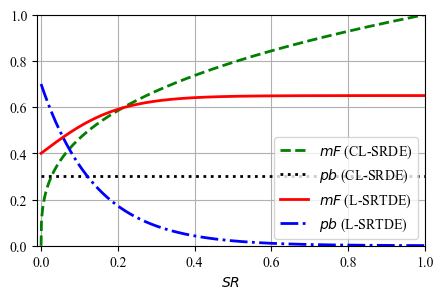

In [7]:
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig = plt.figure(figsize=(5, 3))
x = np.linspace(0,1,1001)
y = 0.4+0.25*np.tanh(5*x)
y2 = x**(1/3)
y3 = 0.7*np.exp(-7*x)
y4 = np.ones(1001)*0.3
plt.plot(x,y2,label=r'$mF$ (CL-SRDE)',c="green",lw=2, linestyle='--')
plt.plot(x,y4,label=r'$pb$ (CL-SRDE)',c="black",lw=2, linestyle=':')
plt.plot(x,y,label=r'$mF$ (L-SRTDE)',c="red",lw=2, linestyle='-')
plt.plot(x,y3,label=r'$pb$ (L-SRTDE)',c="blue",lw=2, linestyle='-.')
plt.xlim(-0.01,1)
plt.ylim(0,1)
plt.xlabel(r'$SR$')
plt.legend()
plt.grid(True)
#print(x)
#fig.savefig("graph_1"+".eps",bbox_inches='tight')
#fig.savefig("graph_1"+".png",bbox_inches='tight')
#fig.savefig("graph_1"+".svg",bbox_inches='tight')
fig.savefig("graph_1"+".pdf",bbox_inches='tight')

# Algorithm configuration experiments

In [8]:
AlgNames3 = []
for ps in range(80,81,10):    
    for cv in range(0,3,1):
        for ei in range(25,26,5):            
            for gr in range(0,1,2): 
                for cf in range(0,4,1):
                    for sp in range(9,10,1):
                        for crs in range(0,2,1):
                            AlgNames3.append(f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}_")#pass
NAlg = len(AlgNames3)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames3)):
    AllResCEC20[i,:2] = get_my_res(AlgNames3[i])    
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)

str2 = "CHT & PAM & CRS & Rank & Place \\\\\n\\hline\n"
for alg in range(NAlg):
    cv = int(AlgNames3[places[alg]][14])
    cf = int(AlgNames3[places[alg]][27])
    crs = int(AlgNames3[places[alg]][36])
    crson = "On"
    if(crs == 0):
        crson = "Off"
    rankstring = f"{FinalRanking[places[alg]]:.2f}"
    str2 += f"{cv+1} & {cf+1} & {crson} & {rankstring} & {alg+1} \\\\\n"    
print(str2)

CHT & PAM & CRS & Rank & Place \\
\hline
1 & 1 & On & 8.69 & 1 \\
1 & 1 & Off & 9.52 & 2 \\
1 & 3 & Off & 10.36 & 3 \\
1 & 3 & On & 10.44 & 4 \\
3 & 1 & On & 10.54 & 5 \\
1 & 2 & Off & 11.22 & 6 \\
3 & 1 & Off & 11.25 & 7 \\
1 & 4 & On & 11.36 & 8 \\
1 & 2 & On & 11.37 & 9 \\
2 & 4 & On & 11.38 & 10 \\
3 & 2 & Off & 11.43 & 11 \\
3 & 4 & On & 11.50 & 12 \\
2 & 4 & Off & 11.50 & 13 \\
3 & 3 & On & 11.56 & 14 \\
1 & 4 & Off & 11.66 & 15 \\
3 & 3 & Off & 11.68 & 16 \\
3 & 4 & Off & 11.78 & 17 \\
2 & 2 & On & 11.99 & 18 \\
2 & 2 & Off & 12.10 & 19 \\
2 & 3 & Off & 12.61 & 20 \\
2 & 1 & On & 12.70 & 21 \\
2 & 3 & On & 12.84 & 22 \\
2 & 1 & Off & 13.24 & 23 \\
3 & 2 & On & 13.28 & 24 \\



In [9]:
str2 = ""
for i1,alg1 in enumerate([places[0]]):
    #print(AlgNames4_alt[alg1])
    for i2,alg2 in enumerate([i for i in range(NAlg)]):
        #print(AlgNames4_alt[alg2])
        totalZ = 0
        total_plus = 0
        total_eq = 0
        total_minus = 0
        for i3, prob in enumerate(probRanges):
            tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
            totalZ += Zval
            if(tres == -1):
                total_minus += 1
            if(tres == 0):
                total_eq += 1
            if(tres == 1):
                total_plus += 1
        #print(AlgNames3[alg1],"vs",AlgNames3[alg2],total_plus, total_eq, total_minus, totalZ)
        cv = int(AlgNames3[places[alg2]][14])
        cf = int(AlgNames3[places[alg2]][27])
        crs = int(AlgNames3[places[alg2]][36])
        #print(cv,cf,crs)
        crson = "On"
        if(crs == 0):
            crson = "Off"
        rankstring = f"{FinalRanking[places[alg2]]:.2f}"
        #if(alg == 0):
        #    rankstring = "\\textbf{"+rankstring+"}"
        if(alg1 == alg2):
            continue
        str2 += f"{cv+1} & {cf+1} & {crson} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} \\\\\n"
print(str2)

1 & 1 & On & 3 & 53 & 1 & 26.75 \\
1 & 3 & Off & 13 & 32 & 12 & 7.43 \\
1 & 3 & On & 17 & 26 & 14 & 6.49 \\
3 & 1 & On & 9 & 42 & 6 & 17.62 \\
1 & 2 & Off & 8 & 42 & 7 & 2.74 \\
3 & 1 & Off & 22 & 25 & 10 & 60.83 \\
1 & 4 & On & 22 & 26 & 9 & 50.69 \\
1 & 2 & On & 29 & 21 & 7 & 105.25 \\
2 & 4 & On & 29 & 21 & 7 & 103.22 \\
3 & 2 & Off & 27 & 20 & 10 & 103.66 \\
3 & 4 & On & 28 & 19 & 10 & 100.75 \\
2 & 4 & Off & 26 & 25 & 6 & 93.93 \\
3 & 3 & On & 25 & 24 & 8 & 93.72 \\
1 & 4 & Off & 23 & 25 & 9 & 86.52 \\
3 & 3 & Off & 23 & 23 & 11 & 78.83 \\
3 & 4 & Off & 29 & 21 & 7 & 117.39 \\
2 & 2 & On & 28 & 21 & 8 & 116.78 \\
2 & 2 & Off & 29 & 18 & 10 & 99.46 \\
2 & 3 & Off & 28 & 19 & 10 & 111.02 \\
2 & 1 & On & 32 & 17 & 8 & 114.82 \\
2 & 3 & On & 30 & 19 & 8 & 113.79 \\
2 & 1 & Off & 25 & 20 & 12 & 87.51 \\
3 & 2 & On & 25 & 23 & 9 & 91.37 \\



# Population size influence

In [10]:
AlgNames3 = []
for ps in range(10,101,10):    
    for cv in range(0,1,1):
        for ei in range(25,26,5):            
            for gr in range(0,1,2): 
                for cf in range(0,1,1):
                    for sp in range(9,10,1):
                        for crs in range(1,2,1):
                            AlgNames3.append(f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}_")#pass
NAlg = len(AlgNames3)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames3)):
    AllResCEC20[i,:2] = get_my_res(AlgNames3[i])    
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)

Zscores_graph = np.zeros(NAlg)
str2 = "N & Wins & Ties & Losses & Score & Rank & Place \\\\\n\\hline\n"
for alg in range(NAlg):
    #print(AlgNames3[places[alg]])
    if(AlgNames3[alg][14] == "V"):
        ps = int(AlgNames3[alg][9:12])        
    else:
        ps = int(AlgNames3[alg][9:11])        
    #print(cv,cf,crs)
    crson = "On"
    if(crs == 0):
        crson = "Off"
    rankstring = f"{FinalRanking[alg]:.2f}"

    alg2 = alg
    alg1 = 3
    
    #print(AlgNames4_alt[alg2])
    totalZ = 0
    total_plus = 0
    total_eq = 0
    total_minus = 0
    for i3, prob in enumerate(probRanges):
        tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
        totalZ += Zval
        if(tres == -1):
            total_minus += 1
        if(tres == 0):
            total_eq += 1
        if(tres == 1):
            total_plus += 1
    #print(AlgNames3[alg1],"vs",AlgNames3[alg2],total_plus, total_eq, total_minus, totalZ)
    if(AlgNames3[alg][14] == "V"):
        ps = int(AlgNames3[alg][9:12])        
    else:
        ps = int(AlgNames3[alg][9:11]) 
    #print(cv,cf,crs)
    #crson = "On"
    #if(crs == 0):
    #    crson = "Off"
    #rankstring = f"{FinalRanking[places[alg2]]:.2f}"
    #if(alg == 0):
    #    rankstring = "\\textbf{"+rankstring+"}"
    #if(alg1 == alg2):
    #    continue
    str2 += f"${ps}D$ & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "

    Zscores_graph[alg] = totalZ

    
    #if(alg == 0):
    #    rankstring = "\\textbf{"+rankstring+"}"
    str2 += f"& {rankstring} & {int(ranks1[alg])+1} \\\\\n"    
print(str2)
#for alg in range(NAlg):    
#    print(f'{AlgNames3[alg]}\t'+ "{:.2f}".format(FinalRanking[alg])+ f"\t{int(ranks1[alg])+1}")
#print()
#for alg in range(NAlg):    
#    print(f'{AlgNames3[places[alg]]}\t'+ "{:.2f}".format(FinalRanking[places[alg]])+ f"\t{alg+1}")

N & Wins & Ties & Losses & Score & Rank & Place \\
\hline
$10D$ & 30 & 17 & 10 & 105.15 & 5.04 & 10 \\
$20D$ & 19 & 29 & 9 & 42.45 & 4.23 & 3 \\
$30D$ & 5 & 49 & 3 & 14.91 & 4.20 & 2 \\
$40D$ & 0 & 57 & 0 & 0.00 & 4.12 & 1 \\
$50D$ & 4 & 49 & 4 & 5.80 & 4.28 & 4 \\
$60D$ & 8 & 43 & 6 & 7.64 & 4.59 & 7 \\
$70D$ & 11 & 39 & 7 & 9.98 & 4.55 & 6 \\
$80D$ & 13 & 34 & 10 & 3.44 & 4.42 & 5 \\
$90D$ & 14 & 33 & 10 & 17.26 & 4.64 & 8 \\
$100D$ & 14 & 33 & 10 & 14.41 & 4.92 & 9 \\



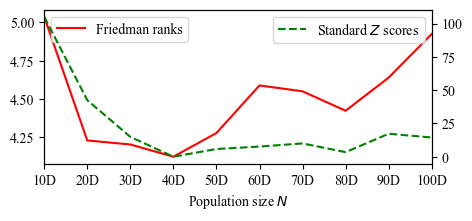

In [11]:
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,2)) 
ax2 = ax1.twinx() 
#plt.grid(True)
xvals = np.arange(1,11)*10
xvalsticks = []
for i in range(10):
    xvalsticks.append(rf"{xvals[i]}D")
ax1.plot(xvals,FinalRanking, label=f'Friedman ranks', c='red', linestyle='-',alpha=1.0)
ax2.plot(xvals,Zscores_graph, label=f'Standard $Z$ scores', c='green', linestyle='--',alpha=1.0)
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend()
ax1.set_xlim(10,100)
ax1.set_xticks(xvals)
ax1.set_xticklabels(xvalsticks)
ax1.set_xlabel(r"Population size $N$")
#for lh in leg1.legendHandles: 
#    lh.set_alpha(1)

plt.show()
#fig.savefig("population_size_influence"+".eps",bbox_inches='tight')
#fig.savefig("population_size_influence"+".png",bbox_inches='tight')
#fig.savefig("population_size_influence"+".svg",bbox_inches='tight')
fig.savefig("population_size_influence"+".pdf",bbox_inches='tight')

# Selective pressure influence

In [12]:
AlgNames3 = []
for ps in range(80,81,10):    
    for cv in range(0,1,1):
        for ei in range(25,26,5):            
            for gr in range(0,1,2): 
                for cf in range(0,1,1):
                    for sp in range(0,13,1):
                        for crs in range(1,2,1):  
                            AlgNames3.append(f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}_")#pass
NAlg = len(AlgNames3)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames3)):
    AllResCEC20[i,:2] = get_my_res(AlgNames3[i])    
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)
#print(ranks1)
#print(str1)
#print()
Zscores_graph = np.zeros(NAlg)
str2 = "$kp$ & Wins & Ties & Losses & Score & Rank & Place \\\\\n\\hline\n"
for alg in range(NAlg):    
    rankstring = f"{FinalRanking[alg]:.2f}"
    alg2 = alg
    alg1 = places[0]    
    totalZ = 0
    total_plus = 0
    total_eq = 0
    total_minus = 0
    for i3, prob in enumerate(probRanges):
        tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
        totalZ += Zval
        if(tres == -1):
            total_minus += 1
        if(tres == 0):
            total_eq += 1
        if(tres == 1):
            total_plus += 1
    if(AlgNames3[alg][33] == "C"):
        kp = int(AlgNames3[alg][31:32])        
    else:
        kp = int(AlgNames3[alg][31:33]) 
    str2 += f"{kp} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "
    Zscores_graph[alg] = totalZ
    str2 += f"& {rankstring} & {int(ranks1[alg])+1} \\\\\n"    
print(str2)

$kp$ & Wins & Ties & Losses & Score & Rank & Place \\
\hline
0 & 24 & 29 & 4 & 122.53 & 8.59 & 13 \\
1 & 21 & 34 & 2 & 95.25 & 8.09 & 12 \\
2 & 18 & 35 & 4 & 68.67 & 6.99 & 11 \\
3 & 13 & 41 & 3 & 63.57 & 6.89 & 10 \\
4 & 13 & 43 & 1 & 51.26 & 6.03 & 9 \\
5 & 8 & 48 & 1 & 39.03 & 5.85 & 8 \\
6 & 5 & 50 & 2 & 18.91 & 5.19 & 5 \\
7 & 1 & 56 & 0 & 21.20 & 5.53 & 7 \\
8 & 0 & 56 & 1 & 8.16 & 4.87 & 3 \\
9 & 0 & 57 & 0 & 0.00 & 4.61 & 1 \\
10 & 1 & 55 & 1 & 10.31 & 5.43 & 6 \\
11 & 2 & 55 & 0 & 10.13 & 5.13 & 4 \\
12 & 1 & 53 & 3 & 1.86 & 4.79 & 2 \\



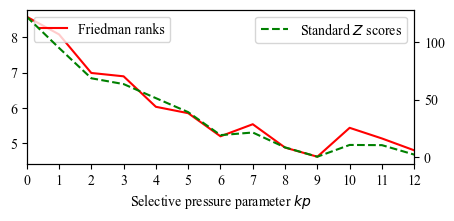

In [13]:
import matplotlib
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,2)) 
ax2 = ax1.twinx() 
#plt.grid(True)
xvals = np.arange(0,13)
xvalsticks = []
#for i in range(13):
#    xvalsticks.append(rf"{xvals[i]}D")
ax1.plot(xvals,FinalRanking, label=f'Friedman ranks', c='red', linestyle='-',alpha=1.0)
ax2.plot(xvals,Zscores_graph, label=f'Standard $Z$ scores', c='green', linestyle='--',alpha=1.0)
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend()
ax1.set_xlim(0,12)
ax1.set_xticks(xvals)
#ax1.set_xticklabels(xvalsticks)
ax1.set_xlabel(r"Selective pressure parameter $kp$")
#for lh in leg1.legendHandles: 
#    lh.set_alpha(1)
plt.show()
#fig.savefig("selective_pressure_influence"+".eps",bbox_inches='tight')
#fig.savefig("selective_pressure_influence"+".png",bbox_inches='tight')
#fig.savefig("selective_pressure_influence"+".svg",bbox_inches='tight')
fig.savefig("selective_pressure_influence"+".pdf",bbox_inches='tight')

# Theta influence

In [14]:
AlgNames3 = []
for ps in range(80,81,10):    
    for cv in range(0,1,1):
        for ei in range(0,51,5):            
            for gr in range(0,1,2): 
                for cf in range(0,1,1):
                    for sp in range(9,10,1):
                        for crs in range(1,2,1):  
                            AlgNames3.append(f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}_")#pass
NAlg = len(AlgNames3)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames3)):
    AllResCEC20[i,:2] = get_my_res(AlgNames3[i])    
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)
#print(ranks1)
#print(str1)
#print()
Zscores_graph = np.zeros(NAlg)
str2 = "$\\theta_{p}$ & Wins & Ties & Losses & Score & Rank & Place \\\\\n\\hline\n"
for alg in range(NAlg):    
    rankstring = f"{FinalRanking[alg]:.2f}"
    alg2 = alg
    alg1 = places[0]
    totalZ = 0
    total_plus = 0
    total_eq = 0
    total_minus = 0
    for i3, prob in enumerate(probRanges):
        tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
        totalZ += Zval
        if(tres == -1):
            total_minus += 1
        if(tres == 0):
            total_eq += 1
        if(tres == 1):
            total_plus += 1  
    if(AlgNames3[alg][20] != "G"):
        th = int(AlgNames3[alg][18:20])*0.01       
    else:
        th = int(AlgNames3[alg][18:19])*0.01
    str2 += f"{th:.2g} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "
    Zscores_graph[alg] = totalZ
    str2 += f"& {rankstring} & {int(ranks1[alg])+1} \\\\\n"    
print(str2)

$\theta_{p}$ & Wins & Ties & Losses & Score & Rank & Place \\
\hline
0 & 20 & 31 & 6 & 81.42 & 6.86 & 11 \\
0.05 & 14 & 37 & 6 & 53.09 & 6.07 & 10 \\
0.1 & 12 & 40 & 5 & 43.07 & 5.50 & 9 \\
0.15 & 12 & 40 & 5 & 32.21 & 5.00 & 7 \\
0.2 & 4 & 49 & 4 & 19.06 & 4.57 & 5 \\
0.25 & 0 & 57 & 0 & 0.00 & 4.18 & 1 \\
0.3 & 4 & 50 & 3 & 22.20 & 4.36 & 3 \\
0.35 & 8 & 43 & 6 & 21.88 & 4.28 & 2 \\
0.4 & 14 & 38 & 5 & 47.85 & 4.69 & 6 \\
0.45 & 14 & 38 & 5 & 61.91 & 5.10 & 8 \\
0.5 & 16 & 33 & 8 & 55.10 & 4.40 & 4 \\



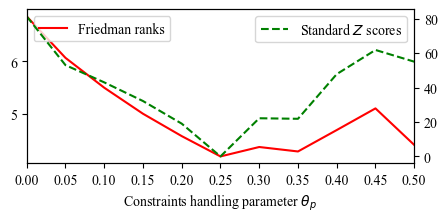

In [15]:
import matplotlib
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,2)) 
ax2 = ax1.twinx() 
#plt.grid(True)
xvals = np.arange(0,11)*5/100
xvalsticks = []
#for i in range(13):
#    xvalsticks.append(rf"{xvals[i]}D")
ax1.plot(xvals,FinalRanking, label=f'Friedman ranks', c='red', linestyle='-',alpha=1.0)
ax2.plot(xvals,Zscores_graph, label=f'Standard $Z$ scores', c='green', linestyle='--',alpha=1.0)
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend()
ax1.set_xlim(0,0.1)
ax1.set_xticks(xvals)
#ax1.set_xticklabels(xvalsticks)
ax1.set_xlabel(r"Constraints handling parameter $\theta_p$")
#for lh in leg1.legendHandles: 
#    lh.set_alpha(1)
plt.show()
#fig.savefig("theta_influence"+".eps",bbox_inches='tight')
#fig.savefig("theta_influence"+".png",bbox_inches='tight')
#fig.savefig("theta_influence"+".svg",bbox_inches='tight')
fig.savefig("theta_influence"+".pdf",bbox_inches='tight')

# Gradient repair influence

In [16]:
AlgNames3 = []
for ps in range(80,81,10):    
    for cv in range(0,1,1):
        for ei in range(25,26,5):            
            for gr in range(0,21,2): 
                for cf in range(0,1,1):
                    for sp in range(9,10,1):
                        for crs in range(1,2,1):  
                            AlgNames3.append(f"D10_L6_PS{ps}_CV{cv}_EI{ei}_GR{gr}_CF{cf}_SP{sp}_CRS{crs}_")#pass
NAlg = len(AlgNames3)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames3)):
    AllResCEC20[i,:2] = get_my_res(AlgNames3[i])    
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)
Zscores_graph = np.zeros(NAlg)
str2 = "$p_{gr}$ & Wins & Ties & Losses & Score & Rank & Place \\\\\n\\hline\n"
for alg in range(NAlg):    
    rankstring = f"{FinalRanking[alg]:.2f}"
    alg2 = alg
    alg1 = places[0]
    totalZ = 0
    total_plus = 0
    total_eq = 0
    total_minus = 0
    for i3, prob in enumerate(probRanges):
        tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
        totalZ += Zval
        if(tres == -1):
            total_minus += 1
        if(tres == 0):
            total_eq += 1
        if(tres == 1):
            total_plus += 1
    #print(AlgNames3[alg],AlgNames3[alg][23:26])    
    if(AlgNames3[alg][25] != "C"):
        th = int(AlgNames3[alg][23:25])*0.01       
    else:
        th = int(AlgNames3[alg][23:24])*0.01
    str2 += f"{th:.2g} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "
    Zscores_graph[alg] = totalZ
    str2 += f"& {rankstring} & {int(ranks1[alg])+1} \\\\\n"    
print(str2)

$p_{gr}$ & Wins & Ties & Losses & Score & Rank & Place \\
\hline
0 & 10 & 35 & 12 & -3.80 & 4.67 & 2 \\
0.02 & 7 & 46 & 4 & 25.61 & 6.25 & 11 \\
0.04 & 3 & 52 & 2 & 4.40 & 5.33 & 10 \\
0.06 & 2 & 53 & 2 & 4.40 & 4.83 & 5 \\
0.08 & 2 & 53 & 2 & -6.99 & 4.72 & 3 \\
0.1 & 1 & 55 & 1 & -1.14 & 4.77 & 4 \\
0.12 & 0 & 57 & 0 & 0.00 & 4.36 & 1 \\
0.14 & 5 & 50 & 2 & 15.81 & 4.85 & 6 \\
0.16 & 9 & 47 & 1 & 28.01 & 4.99 & 7 \\
0.18 & 8 & 44 & 5 & 26.81 & 5.01 & 8 \\
0.2 & 10 & 44 & 3 & 28.56 & 5.22 & 9 \\



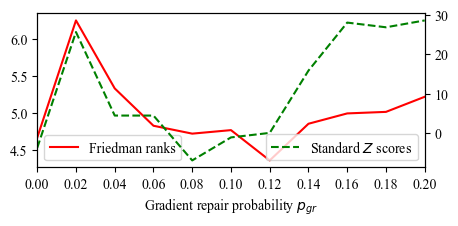

In [17]:
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,2)) 
ax2 = ax1.twinx() 
#plt.grid(True)
xvals = np.arange(0,11)*2/100
xvalsticks = []
#for i in range(13):
#    xvalsticks.append(rf"{xvals[i]}D")
ax1.plot(xvals,FinalRanking, label=f'Friedman ranks', c='red', linestyle='-',alpha=1.0)
ax2.plot(xvals,Zscores_graph, label=f'Standard $Z$ scores', c='green', linestyle='--',alpha=1.0)
leg1 = ax1.legend(loc='lower left')
leg2 = ax2.legend()
ax1.set_xlim(0,10/100)
ax1.set_xticks(xvals)
#ax1.set_xticklabels(xvalsticks)
ax1.set_xlabel(r"Gradient repair probability $p_{gr}$")
#for lh in leg1.legendHandles: 
#    lh.set_alpha(1)
plt.show()
#fig.savefig("gradient_repair_influence"+".eps",bbox_inches='tight')
#fig.savefig("gradient_repair_influence"+".png",bbox_inches='tight')
#fig.savefig("gradient_repair_influence"+".svg",bbox_inches='tight')
fig.savefig("gradient_repair_influence"+".pdf",bbox_inches='tight')

# Comparison to other methods

In [18]:
AlgNames1 = ['DEQL.xlsx', 'BiPop.xlsx', 'FCHA.xlsx', 'COLSHADE.xlsx', 'EnMODE.xlsx', 'VMCH.xlsx', 'SASS.xlsx', 'sCMAgES.xlsx']
AlgNames2 = ['SASS_mod', 'sCMAgES_mod', 'BiPop_mod', 'UDEIII']
AlgNames3 = ['D10_L6_PS80_CV0_EI25_GR0_CF0_SP9_CRS1_','D10_L6_PS80_CV0_EI25_GR8_CF1_SP9_CRS1_','D10_L6_PS80_CV0_EI25_GR8_CF0_SP9_CRS1_','D10_L6_PS40_CV0_EI25_GR8_CF0_SP9_CRS1_']              
AlgNames4 = AlgNames1 + AlgNames2 + AlgNames3
AlgNames4_alt1 = ['DEQL', 'BPMAgES', 'FCHA', 'COLSHADE', 'EnMODE', 'VMCH', 'SASS', 'sCMAgES', 'SASS (no GR)', 'sCMAgES (no GR)', 'BPMAgES (no GR)','UDE-III','CL-SRDE-GR (no GR)','CL-SRDE-GR (PAM 2)','CL-SRDE-GR','CL-SRDE-GR ($40D$)']
AlgNames4_alt = ['DEQL \cite{Kizilay2020ADE}', 
                 'BPMAgES \cite{Hellwig2020AMM}', 
                 'FCHA \cite{Akhmedova2020SelftuningCO}', 
                 'COLSHADE \cite{GurrolaRamos2020COLSHADEFR}', 
                 'EnMODE \cite{Sallam2020MultiOperatorDE}', 
                 'VMCH \cite{Wen2020VotingmechanismBE}', 
                 'SASS \cite{Kumar2020ASS}', 
                 'sCMAgES \cite{Kumar2020AMC}', 
                 'SASS (no GR)', 
                 'sCMAgES (no GR)', 
                 'BPMAgES (no GR)',
                 'UDE-III \cite{Trivedi2024UDEIIIAE}',
                 'CL-SRDE-GR (no GR)',
                 'CL-SRDE-GR (PAM 2)',
                 'CL-SRDE-GR',
                 'CL-SRDE-GR ($40D$)']
print(AlgNames4)

['DEQL.xlsx', 'BiPop.xlsx', 'FCHA.xlsx', 'COLSHADE.xlsx', 'EnMODE.xlsx', 'VMCH.xlsx', 'SASS.xlsx', 'sCMAgES.xlsx', 'SASS_mod', 'sCMAgES_mod', 'BiPop_mod', 'UDEIII', 'D10_L6_PS80_CV0_EI25_GR0_CF0_SP9_CRS1_', 'D10_L6_PS80_CV0_EI25_GR8_CF1_SP9_CRS1_', 'D10_L6_PS80_CV0_EI25_GR8_CF0_SP9_CRS1_', 'D10_L6_PS40_CV0_EI25_GR8_CF0_SP9_CRS1_']


In [19]:
# Reading all results
NAlg = len(AlgNames4)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames1)):
    AllResCEC20[i,:2] = get_res_xlsx(AlgNames1[i])
for i in range(len(AlgNames2)):
    if AlgNames2[i] == 'UDEIII':
        AllResCEC20[i+len(AlgNames1),:2] = get_res_dat(AlgNames2[i])
    else:
        AllResCEC20[i+len(AlgNames1),:2] = get_res_txt(AlgNames2[i])
for i in range(len(AlgNames3)):
    AllResCEC20[i+len(AlgNames1)+len(AlgNames2),:2] = get_my_res(AlgNames3[i])

In [20]:
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
#for prob in range(1):
    #print(prob)
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    #print(maxfit)
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
        #print(AlgNames4[alg],AllResCEC20[alg,2,:,prob])    
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
for alg in range(NAlg):
    print(f'{AlgNames4_alt[places[alg]]}\t'+ "{:.2f}".format(FinalRanking[places[alg]])+ f"\t{alg+1}")

CL-SRDE-GR (PAM 2)	3.01	1
CL-SRDE-GR	3.34	2
CL-SRDE-GR (no GR)	3.45	3
SASS \cite{Kumar2020ASS}	4.37	4
CL-SRDE-GR ($40D$)	4.39	5
sCMAgES \cite{Kumar2020AMC}	6.19	6
BPMAgES \cite{Hellwig2020AMM}	6.78	7
COLSHADE \cite{GurrolaRamos2020COLSHADEFR}	7.35	8
SASS (no GR)	7.70	9
UDE-III \cite{Trivedi2024UDEIIIAE}	9.25	10
BPMAgES (no GR)	9.83	11
VMCH \cite{Wen2020VotingmechanismBE}	9.87	12
EnMODE \cite{Sallam2020MultiOperatorDE}	10.34	13
sCMAgES (no GR)	10.73	14
DEQL \cite{Kizilay2020ADE}	10.77	15
FCHA \cite{Akhmedova2020SelftuningCO}	12.62	16


In [21]:
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    maxfit = np.max(AllResCEC20[:,0,:,prob])
    if(np.isnan(maxfit)):
        maxfit = 1e100
    #print(maxfit)
    for alg in range(NAlg):
        for r in range(NRuns):
            if(np.isnan(AllResCEC20[alg,0,r,prob])):
                AllResCEC20[alg,0,r,prob] = 1e100
            if(np.isnan(AllResCEC20[alg,1,r,prob])):
                AllResCEC20[alg,1,r,prob] = 1e100
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + 1 + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
        #print(AlgNames4[alg],AllResCEC20[alg,2,:,prob])    
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
places = np.argsort(FinalRanking)
places = np.argsort(FinalRanking)
ranks1 = get_fract_ranks(FinalRanking)
Zscores_graph = np.zeros(NAlg)
str2 = "Algorithm & Wins & Ties & Losses & Score & Rank \\\\\n\\hline\n" # & Place
for alg2 in range(NAlg):
    alg = places[alg2]
    rankstring = f"{FinalRanking[alg]:.2f}"
    alg1 = places[0]
    alg1 = NAlg-2
    totalZ = 0
    total_plus = 0
    total_eq = 0
    total_minus = 0
    for i3, prob in enumerate(probRanges):
        tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg,2,:,prob],AllResCEC20[alg1,2,:,prob])
        totalZ += Zval
        if(tres == -1):
            total_minus += 1
        if(tres == 0):
            total_eq += 1
        if(tres == 1):
            total_plus += 1
    str2 += f"{AlgNames4_alt[alg]} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "
    Zscores_graph[alg] = totalZ
    str2 += f"& {rankstring}  \\\\\n"
print(str2)

Algorithm & Wins & Ties & Losses & Score & Rank \\
\hline
CL-SRDE-GR (PAM 2) & 13 & 27 & 17 & -5.94 & 3.01  \\
CL-SRDE-GR & 0 & 57 & 0 & 0.00 & 3.34  \\
CL-SRDE-GR (no GR) & 10 & 35 & 12 & 10.41 & 3.45  \\
SASS \cite{Kumar2020ASS} & 31 & 7 & 19 & 64.42 & 4.37  \\
CL-SRDE-GR ($40D$) & 12 & 41 & 4 & 44.55 & 4.39  \\
sCMAgES \cite{Kumar2020AMC} & 38 & 11 & 8 & 161.58 & 6.19  \\
BPMAgES \cite{Hellwig2020AMM} & 34 & 11 & 12 & 137.90 & 6.78  \\
COLSHADE \cite{GurrolaRamos2020COLSHADEFR} & 37 & 4 & 16 & 128.80 & 7.35  \\
SASS (no GR) & 45 & 7 & 5 & 231.21 & 7.70  \\
UDE-III \cite{Trivedi2024UDEIIIAE} & 41 & 11 & 5 & 210.40 & 9.25  \\
BPMAgES (no GR) & 39 & 13 & 5 & 218.63 & 9.83  \\
VMCH \cite{Wen2020VotingmechanismBE} & 44 & 2 & 11 & 207.58 & 9.87  \\
EnMODE \cite{Sallam2020MultiOperatorDE} & 45 & 4 & 8 & 221.60 & 10.34  \\
sCMAgES (no GR) & 47 & 5 & 5 & 253.34 & 10.73  \\
DEQL \cite{Kizilay2020ADE} & 37 & 5 & 15 & 139.69 & 10.77  \\
FCHA \cite{Akhmedova2020SelftuningCO} & 51 & 1 & 5 & 279.4

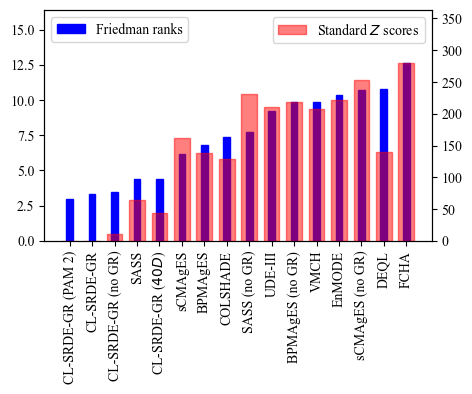

In [22]:
font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,3)) 
ax2 = ax1.twinx() 
numbers = np.arange(0,NAlg,1)
ax1.bar(numbers,FinalRanking[places], label=f'Friedman ranks',width=0.3,edgecolor='b',color='b',align='center',alpha=1)
ax2.bar(numbers,Zscores_graph[places], label=f'Standard $Z$ scores',width=0.7,edgecolor='r',color='r',align='center',alpha=0.5)
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend(loc='upper right')
ax1.set_ylim(0,np.max(FinalRanking)*1.3)
ax2.set_ylim(0,np.max(Zscores_graph)*1.3)
np_AlgNames4_alt1 = np.array(AlgNames4_alt1)
ax1.set_xticks(numbers,np_AlgNames4_alt1[places],rotation ='vertical')
plt.show()
#fig.savefig("alt_bar"+".eps",bbox_inches='tight')
#fig.savefig("alt_bar"+".png",bbox_inches='tight')
#fig.savefig("alt_bar"+".svg",bbox_inches='tight')
fig.savefig("alt_bar"+".pdf",bbox_inches='tight')

# Comparison on different problem classes

In [23]:
for range_num in range(0,6):
    FinalRanking = np.zeros(NAlg)
    RankingProblem = np.zeros((NAlg,NProblems))
    for i3, prob in enumerate(probRanges2[range_num]):
        RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
        FinalRanking += RankingProblem[:,prob]*w[prob]
    places = np.argsort(FinalRanking)
    places = np.argsort(FinalRanking)
    ranks1 = get_fract_ranks(FinalRanking)
    Zscores_graph = np.zeros(NAlg)
    str2 = "\\multicolumn{6}{|c|}{"+f"{RangeNames[range_num]}"+  "}\\\\\n\\hline\n"
    str2 += "Algorithm & Wins & Ties & Losses & Score & Rank \\\\\n\\hline\n" #& Place 
    for alg2 in range(NAlg):
        alg = places[alg2]
        rankstring = f"{FinalRanking[alg]:.2f}"
        alg2 = alg
        alg1 = NAlg-1
        totalZ = 0
        total_plus = 0
        total_eq = 0
        total_minus = 0
        for i3, prob in enumerate(probRanges2[range_num]):
            tres,Zval = MannWhitneyU_myZ(AllResCEC20[alg2,2,:,prob],AllResCEC20[alg1,2,:,prob])
            totalZ += Zval
            if(tres == -1):
                total_minus += 1
            if(tres == 0):
                total_eq += 1
            if(tres == 1):
                total_plus += 1
        str2 += f"{AlgNames4_alt[alg]} & {total_plus} & {total_eq} & {total_minus} & {totalZ:.2f} "    
        Zscores_graph[alg] = totalZ
        str2 += f"& {rankstring}  \\\\\n" 
    str2 += "\\hline\n"
    print(str2)

\multicolumn{6}{|c|}{Industrial Chemical Processes}\\
\hline
Algorithm & Wins & Ties & Losses & Score & Rank \\
\hline
CL-SRDE-GR ($40D$) & 0 & 7 & 0 & 0.00 & 0.25  \\
CL-SRDE-GR (no GR) & 2 & 4 & 1 & 1.29 & 0.29  \\
CL-SRDE-GR & 1 & 6 & 0 & 6.80 & 0.31  \\
CL-SRDE-GR (PAM 2) & 4 & 2 & 1 & 13.80 & 0.41  \\
SASS \cite{Kumar2020ASS} & 4 & 1 & 2 & 13.20 & 0.41  \\
sCMAgES \cite{Kumar2020AMC} & 4 & 1 & 2 & 15.45 & 0.45  \\
SASS (no GR) & 5 & 2 & 0 & 27.98 & 0.61  \\
COLSHADE \cite{GurrolaRamos2020COLSHADEFR} & 4 & 1 & 2 & 15.82 & 0.65  \\
BPMAgES \cite{Hellwig2020AMM} & 5 & 1 & 1 & 22.87 & 0.72  \\
sCMAgES (no GR) & 6 & 1 & 0 & 34.31 & 0.95  \\
DEQL \cite{Kizilay2020ADE} & 4 & 1 & 2 & 14.48 & 0.98  \\
BPMAgES (no GR) & 5 & 2 & 0 & 30.20 & 1.00  \\
VMCH \cite{Wen2020VotingmechanismBE} & 6 & 0 & 1 & 30.47 & 1.01  \\
EnMODE \cite{Sallam2020MultiOperatorDE} & 5 & 1 & 1 & 25.04 & 1.04  \\
UDE-III \cite{Trivedi2024UDEIIIAE} & 4 & 3 & 0 & 25.92 & 1.04  \\
FCHA \cite{Akhmedova2020SelftuningCO} & 7

# CEC 2020 rules comparison

In [24]:
NAlg = len(AlgNames4)
NRuns = 25
NProblems = 57
AllResCEC20 = np.zeros((NAlg,3,NRuns, NProblems))
for i in range(len(AlgNames1)):
    AllResCEC20[i,:2] = get_res_xlsx(AlgNames1[i])
for i in range(len(AlgNames2)):
    if AlgNames2[i] == 'UDEIII':
        AllResCEC20[i+len(AlgNames1),:2] = get_res_dat(AlgNames2[i])
    else:
        AllResCEC20[i+len(AlgNames1),:2] = get_res_txt(AlgNames2[i])
for i in range(len(AlgNames3)):
    AllResCEC20[i+len(AlgNames1)+len(AlgNames2),:2] = get_my_res(AlgNames3[i])

In [25]:
FinalRanking = np.zeros(NAlg)
RankingProblem = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    where_nan = np.isnan(AllResCEC20[:,0,:,prob])
    #print(where_nan)
    maxfit = np.max(AllResCEC20[:,0,:,prob][~where_nan])    
    where_nan2 = np.isnan(AllResCEC20[:,0,:,prob])
    maxvio = np.max(AllResCEC20[:,1,:,prob][~where_nan2]) 
    #if(np.isnan(maxfit)):
    #    maxfit = 1e100
    #print(prob,maxfit)
    for alg in range(NAlg):
        for r in range(NRuns):
            #if(np.isnan(AllResCEC20[alg,0,r,prob])):
            #    AllResCEC20[alg,0,r,prob] = maxfit[alg,prob]
            #if(np.isnan(AllResCEC20[alg,1,r,prob])):
            #    AllResCEC20[alg,1,r,prob] = maxvio[alg,prob]
            if(AllResCEC20[alg,1,r,prob] > 0):
                AllResCEC20[alg,2,r,prob] = maxfit + AllResCEC20[alg,1,r,prob]
            else:
                AllResCEC20[alg,2,r,prob] = AllResCEC20[alg,0,r,prob]
        #print(AlgNames4[alg],AllResCEC20[alg,2,:,prob])    
    RankingProblem[:,prob] = FriedmanSTest(AllResCEC20[:,2,:,prob], NAlg, NRuns)
    FinalRanking += RankingProblem[:,prob]*w[prob]
best1 = np.zeros((NAlg,NProblems))
best2 = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    for alg in range(NAlg):
        index_best_run = 0#np.argmin(AllResCEC20[alg,2,:,prob])
        #print(index_best_run)
        best1[alg,prob] = (AllResCEC20[alg,0,index_best_run,prob])
        best2[alg,prob] = (AllResCEC20[alg,1,index_best_run,prob])
is_zero = best2==0
is_non_zero = ~is_zero
best = np.zeros((NAlg,NProblems))
score_best = np.zeros(NAlg)
for prob in range(NProblems):
    if(np.sum(is_zero[:,prob]) == 0):
        for alg in range(NAlg):
            best[alg,prob] = best2[alg,prob]
    else:
        M = np.max(best1[is_zero[:,prob],prob])
        #print(prob,M)
        best[is_zero[:,prob],prob] = best1[is_zero[:,prob],prob]
        best[is_non_zero[:,prob],prob] = M + best2[is_non_zero[:,prob],prob]
min_best = np.zeros(NProblems)
max_best = np.zeros(NProblems)
where_nan = np.isnan(best)

for prob in range(NProblems):
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(best[alg,prob])) or (best[alg,prob] < min_best[prob] and ~np.isnan(best[alg,prob]))):
            min_best[prob] = best[alg,prob]
            assinged = 1       
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(best[alg,prob])) or (best[alg,prob] > max_best[prob] and ~np.isnan(best[alg,prob]))):
            max_best[prob] = best[alg,prob]
            assinged = 1
mx_mn_best = max_best-min_best
mx_mn_best[mx_mn_best == 0] = 1e-8
for alg in range(NAlg):
    for prob in range(NProblems):
        if(np.isnan(best[alg,prob])):
            best[alg,prob] = 1
        else:
            best[alg,prob] = (best[alg,prob] - min_best[prob]) / mx_mn_best[prob]
score_best = np.zeros(NAlg)
for alg in range(NAlg):
    for prob in range(NProblems):
        score_best[alg] += best[alg,prob]*w[prob]
print(score_best)

mean1 = np.zeros((NAlg,NProblems))
mean2 = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    for alg in range(NAlg):
        mean1[alg,prob] = np.mean(AllResCEC20[alg,0,:,prob])
        mean2[alg,prob] = np.mean(AllResCEC20[alg,1,:,prob])

is_zero = mean2==0
is_non_zero = ~is_zero
mean = np.zeros((NAlg,NProblems))
score_mean = np.zeros(NAlg)
for prob in range(NProblems):
    if(np.sum(is_zero[:,prob]) == 0):
        for alg in range(NAlg):
            mean[alg,prob] = mean2[alg,prob]
    else:
        M = np.max(mean1[is_zero[:,prob],prob])
        #print(prob,M)
        mean[is_zero[:,prob],prob] = mean1[is_zero[:,prob],prob]
        mean[is_non_zero[:,prob],prob] = M + mean2[is_non_zero[:,prob],prob]
min_mean = np.zeros(NProblems)
max_mean = np.zeros(NProblems)
where_nan = np.isnan(best)

for prob in range(NProblems):
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(mean[alg,prob])) or (mean[alg,prob] < min_mean[prob] and ~np.isnan(mean[alg,prob]))):
            min_mean[prob] = mean[alg,prob]
            assinged = 1       
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(mean[alg,prob])) or (mean[alg,prob] > max_mean[prob] and ~np.isnan(mean[alg,prob]))):
            max_mean[prob] = mean[alg,prob]
            assinged = 1
mx_mn_mean = max_mean-min_mean
mx_mn_mean[mx_mn_mean == 0] = 1e-8
for alg in range(NAlg):
    for prob in range(NProblems):
        if(np.isnan(mean[alg,prob])):
            mean[alg,prob] = 1
        else:
            mean[alg,prob] = (mean[alg,prob] - min_mean[prob]) / mx_mn_mean[prob]
score_mean = np.zeros(NAlg)
for alg in range(NAlg):
    for prob in range(NProblems):
        score_mean[alg] += mean[alg,prob]*w[prob]
print(score_mean)

median1 = np.zeros((NAlg,NProblems))
median2 = np.zeros((NAlg,NProblems))
for prob in range(NProblems):
    for alg in range(NAlg):
        median1[alg,prob] = (AllResCEC20[alg,0,12,prob])
        median2[alg,prob] = (AllResCEC20[alg,1,12,prob])

is_zero = median2==0
is_non_zero = ~is_zero
median = np.zeros((NAlg,NProblems))
score_median = np.zeros(NAlg)
for prob in range(NProblems):
    if(np.sum(is_zero[:,prob]) == 0):
        for alg in range(NAlg):
            median[alg,prob] = median2[alg,prob]
    else:
        M = np.max(median1[is_zero[:,prob],prob])
        #print(prob,M)
        median[is_zero[:,prob],prob] = median1[is_zero[:,prob],prob]
        median[is_non_zero[:,prob],prob] = M + median2[is_non_zero[:,prob],prob]
min_median = np.zeros(NProblems)
max_median = np.zeros(NProblems)
where_nan = np.isnan(best)

for prob in range(NProblems):
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(median[alg,prob])) or (median[alg,prob] < min_median[prob] and ~np.isnan(median[alg,prob]))):
            min_median[prob] = median[alg,prob]
            assinged = 1       
    assinged = 0
    for alg in range(NAlg):
        if((assinged == 0 and ~np.isnan(median[alg,prob])) or (median[alg,prob] > max_median[prob] and ~np.isnan(median[alg,prob]))):
            max_median[prob] = median[alg,prob]
            assinged = 1
mx_mn_median = max_median-min_median
mx_mn_median[mx_mn_median == 0] = 1e-8
for alg in range(NAlg):
    for prob in range(NProblems):
        if(np.isnan(median[alg,prob])):
            median[alg,prob] = 1
        else:
            median[alg,prob] = (median[alg,prob] - min_median[prob]) / mx_mn_median[prob]
score_median = np.zeros(NAlg)
for alg in range(NAlg):
    for prob in range(NProblems):
        score_median[alg] += median[alg,prob]*w[prob]
print(score_median)

[0.55074172 0.26297301 0.8082314  0.16817728 0.35954134 0.36917964
 0.17492929 0.2087232  0.20941786 0.36527889 0.39634531 0.54373974
 0.08007037 0.16181277 0.16101929 0.16465653]
[0.56324783 0.28280862 0.88416671 0.18433839 0.30284218 0.282039
 0.16245723 0.2232722  0.24419518 0.30930515 0.2982556  0.37928649
 0.13370588 0.07764031 0.0991347  0.19532519]
[0.53319382 0.29729856 0.8826405  0.17067932 0.30354385 0.30005072
 0.17376423 0.2309349  0.24581235 0.31358215 0.35428983 0.35963671
 0.093053   0.08711309 0.1006393  0.15115374]


In [26]:
score_total = 0.5*score_best + 0.3*score_mean + 0.2*score_median
indices = np.argsort(score_total)
nums = np.zeros(NAlg)
for alg in range(NAlg):
    nums[indices[alg]] = alg+1
nums[indices] = [i+1 for i in range(NAlg)]
nums

array([15.,  9., 16.,  6., 11., 10.,  4.,  7.,  8., 12., 13., 14.,  1.,
        2.,  3.,  5.])

In [27]:
maxl = 0
for name in AlgNames4_alt:
    maxl = np.max([maxl,len(name)])
for i in range(len(AlgNames4_alt)):
    AlgNames4_alt[i] += " "*(maxl - len(AlgNames4_alt[i]))
prec = 5
for alg in range(NAlg):
    avgfeas = 0
    for prob in range(NProblems):
        feasrate = int(np.mean(AllResCEC20[indices[alg],1,:,prob] == 0)*100) # AllResCEC20[alg,1,:,prob] 
        avgfeas += feasrate
    print(f"{AlgNames4_alt[indices[alg]]} & {score_best[indices[alg]]:.{prec}f} & {score_mean[indices[alg]]:.{prec}f}\
       & {score_median[indices[alg]]:.{prec}f} & {score_total[indices[alg]]:.{prec}f} \\\\")

CL-SRDE-GR (no GR)                         & 0.08007 & 0.13371       & 0.09305 & 0.09876 \\
CL-SRDE-GR (PAM 2)                         & 0.16181 & 0.07764       & 0.08711 & 0.12162 \\
CL-SRDE-GR                                 & 0.16102 & 0.09913       & 0.10064 & 0.13038 \\
SASS \cite{Kumar2020ASS}                   & 0.17493 & 0.16246       & 0.17376 & 0.17095 \\
CL-SRDE-GR ($40D$)                         & 0.16466 & 0.19533       & 0.15115 & 0.17116 \\
COLSHADE \cite{GurrolaRamos2020COLSHADEFR} & 0.16818 & 0.18434       & 0.17068 & 0.17353 \\
sCMAgES \cite{Kumar2020AMC}                & 0.20872 & 0.22327       & 0.23093 & 0.21753 \\
SASS (no GR)                               & 0.20942 & 0.24420       & 0.24581 & 0.22713 \\
BPMAgES \cite{Hellwig2020AMM}              & 0.26297 & 0.28281       & 0.29730 & 0.27579 \\
VMCH \cite{Wen2020VotingmechanismBE}       & 0.36918 & 0.28204       & 0.30005 & 0.32921 \\
EnMODE \cite{Sallam2020MultiOperatorDE}    & 0.35954 & 0.30284       & 0.30354 &

# All problems results record

In [28]:
alg = NAlg-2
print(AlgNames4_alt[alg])
probindex = 0
str3 = ""
for range_num in range(0,6):        
    str3 += "\\hline\n\\multicolumn{4}{|c|}{"+f"{RangeNames[range_num]}"+  "}\\\\\n\\hline\n"
    str3 += "Prob & Target function value & Total violation & FR \\\\\n\\hline\n"
    for i3, prob in enumerate(probRanges2[range_num]):        
        feasrate = int(np.mean(AllResCEC20[alg,1,:,prob] == 0)*100) # AllResCEC20[alg,1,:,prob] 
        #print(feasrate)
        strtmp = f"RC{probindex+1} & {np.mean(AllResCEC20[alg,0,:,prob]):.5g} ({np.std(AllResCEC20[alg,0,:,prob]):.5g}) & {np.mean(AllResCEC20[alg,1,:,prob]):.4g} ({np.std(AllResCEC20[alg,1,:,prob]):.4g}) & {feasrate}\%"
        str3 += strtmp + "\\\\\n"
        #print()
        probindex += 1
    places = np.argsort(FinalRanking)        
print(str3)

CL-SRDE-GR                                
\hline
\multicolumn{4}{|c|}{Industrial Chemical Processes}\\
\hline
Prob & Target function value & Total violation & FR \\
\hline
RC1 & 189.31 (1.6078e-14) & 0 (0) & 100\%\\
RC2 & 7049 (0) & 0 (0) & 100\%\\
RC3 & -72.694 (119.28) & 0 (0) & 100\%\\
RC4 & -0.37656 (0.0049033) & 0 (0) & 100\%\\
RC5 & -373.4 (24.178) & 0 (0) & 100\%\\
RC6 & 1.4039 (0.3253) & 0 (0) & 100\%\\
RC7 & 1.3231 (0.50817) & 0 (0) & 100\%\\
\hline
\multicolumn{4}{|c|}{Process Synthesis and Design Problems}\\
\hline
Prob & Target function value & Total violation & FR \\
\hline
RC8 & 2 (0) & 0 (0) & 100\%\\
RC9 & 2.5577 (0) & 0 (0) & 100\%\\
RC10 & 1.0765 (0) & 0 (0) & 100\%\\
RC11 & 99.89 (2.2074) & 0 (0) & 100\%\\
RC12 & 2.9472 (0.050321) & 0 (0) & 100\%\\
RC13 & 26887 (7.3883e-09) & 0 (0) & 100\%\\
RC14 & 59745 (6285.9) & 0 (0) & 100\%\\
\hline
\multicolumn{4}{|c|}{Mechanical Engineering Problems}\\
\hline
Prob & Target function value & Total violation & FR \\
\hline
RC15 

In [29]:
alg = NAlg-4
print(AlgNames4_alt[alg])
probindex = 0
str3 = ""
for range_num in range(0,6):        
    str3 += "\\hline\n\\multicolumn{4}{|c|}{"+f"{RangeNames[range_num]}"+  "}\\\\\n\\hline\n"
    str3 += "Prob & Target function value & Total violation & FR \\\\\n\\hline\n"
    for i3, prob in enumerate(probRanges2[range_num]):        
        feasrate = int(np.mean(AllResCEC20[alg,1,:,prob] == 0)*100) # AllResCEC20[alg,1,:,prob] 
        #print(feasrate)
        strtmp = f"RC{probindex+1} & {np.mean(AllResCEC20[alg,0,:,prob]):.5g} ({np.std(AllResCEC20[alg,0,:,prob]):.5g}) & {np.mean(AllResCEC20[alg,1,:,prob]):.4g} ({np.std(AllResCEC20[alg,1,:,prob]):.4g}) & {feasrate}\%"
        str3 += strtmp + "\\\\\n"
        #print()
        probindex += 1
    places = np.argsort(FinalRanking)        
print(str3)

CL-SRDE-GR (no GR)                        
\hline
\multicolumn{4}{|c|}{Industrial Chemical Processes}\\
\hline
Prob & Target function value & Total violation & FR \\
\hline
RC1 & 219.3 (74.858) & 0 (0) & 100\%\\
RC2 & 7049 (1.1236e-08) & 0 (0) & 100\%\\
RC3 & -927.13 (3277.9) & 8.179 (27.56) & 88\%\\
RC4 & -0.37479 (0.00025703) & 0 (0) & 100\%\\
RC5 & -392.26 (221.09) & 0.000316 (0.001546) & 88\%\\
RC6 & 1.0081 (0.036539) & 0 (0) & 100\%\\
RC7 & 0.60529 (0.20663) & 0 (0) & 100\%\\
\hline
\multicolumn{4}{|c|}{Process Synthesis and Design Problems}\\
\hline
Prob & Target function value & Total violation & FR \\
\hline
RC8 & 2 (6.2836e-10) & 8.882e-18 (4.351e-17) & 96\%\\
RC9 & 2.5577 (0) & 0 (0) & 100\%\\
RC10 & 1.0765 (0) & 0 (0) & 100\%\\
RC11 & 101.2 (3.4741) & 6.379e-31 (3.125e-30) & 0\%\\
RC12 & 2.9579 (0.054968) & 0 (0) & 100\%\\
RC13 & 27007 (413.83) & 0 (0) & 100\%\\
RC14 & 60497 (8034.6) & 0 (0) & 100\%\\
\hline
\multicolumn{4}{|c|}{Mechanical Engineering Problems}\\
\hline
Prob

# Feasibility rates

In [30]:
allFR = np.zeros((NAlg,NProblems))
allmeanFR = np.zeros(NAlg)
for alg in range(NAlg):
    allfeas = np.zeros(NProblems)
    for prob in range(NProblems):
        allfeas[prob] = np.mean(AllResCEC20[alg,1,:,prob] == 0)
        allFR[alg,prob] = allfeas[prob]
    allmeanFR[alg] = np.mean(allFR[alg])
    #print(AlgNames4_alt[alg],allmeanFR[alg])
indices = np.argsort(-allmeanFR)
for alg in range(NAlg):
    print(f"{AlgNames4_alt[indices[alg]]} & ${np.mean(allFR[indices[alg]]*100):.2f}\\pm{np.std(allFR[indices[alg]]*100):.2f}\%$\\\\")

CL-SRDE-GR (PAM 2)                         & $98.04\pm13.19\%$\\
SASS \cite{Kumar2020ASS}                   & $97.89\pm13.34\%$\\
CL-SRDE-GR                                 & $97.61\pm13.87\%$\\
CL-SRDE-GR ($40D$)                         & $96.70\pm16.04\%$\\
sCMAgES \cite{Kumar2020AMC}                & $95.93\pm18.51\%$\\
CL-SRDE-GR (no GR)                         & $95.44\pm18.60\%$\\
SASS (no GR)                               & $90.60\pm23.12\%$\\
BPMAgES \cite{Hellwig2020AMM}              & $88.91\pm29.27\%$\\
COLSHADE \cite{GurrolaRamos2020COLSHADEFR} & $74.39\pm42.20\%$\\
sCMAgES (no GR)                            & $66.25\pm46.01\%$\\
UDE-III \cite{Trivedi2024UDEIIIAE}         & $65.89\pm45.13\%$\\
DEQL \cite{Kizilay2020ADE}                 & $64.63\pm47.55\%$\\
BPMAgES (no GR)                            & $64.42\pm45.88\%$\\
VMCH \cite{Wen2020VotingmechanismBE}       & $63.58\pm46.90\%$\\
EnMODE \cite{Sallam2020MultiOperatorDE}    & $59.44\pm46.52\%$\\
FCHA \cite{Akhmedova2020S

# Runtime analysis for GR

[ 622.449    1896.414    2641.7592   3012.298    3024.3172   3501.6332
 3672.6872   2653.26788  2607.38292  2107.67376  1590.127908]
0 & 622.449
0.02 & 1896.41
0.04 & 2641.76
0.06 & 3012.3
0.08 & 3024.32
0.1 & 3501.63
0.12 & 3672.69
0.14 & 2653.27
0.16 & 2607.38
0.18 & 2107.67
0.2 & 1590.13


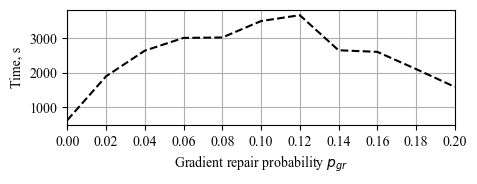

In [54]:
data_time = np.zeros((255,2))
for i in range(255):
    filename = f"time_measure/time_{i+1}.txt"
    data_time[i] = np.loadtxt(filename)
data_time_avg = np.zeros(11)
for i in range(0,21,2):
    data_time2 = []
    for j in range(255):
        if(data_time[j,0] == i):
            data_time2.append(data_time[j,1])
    #print(i,data_time2)
    data_time_avg[int(i/2)] = np.mean(data_time2)
print(data_time_avg)
for i in range(0,21,2):
    print(f"{i/100:.2g} & {data_time_avg[int(i/2)]:.6g}")

font_n = {'family':'times new roman','weight':'normal','size':10}
matplotlib.rc('font', **font_n)
fig, ax1 = plt.subplots(figsize=(5,1.5)) 
plt.grid(True)
xvals = np.arange(0,11)*2/100
xvalsticks = []
#for i in range(13):
#    xvalsticks.append(rf"{xvals[i]}D")
ax1.plot(xvals,data_time_avg, label=f'Friedman ranks', c='black', linestyle='--',alpha=1.0)
#leg1 = ax1.legend(loc='lower left')
#leg2 = ax2.legend()
ax1.set_xlim(0,10/100)
ax1.set_xticks(xvals)
#ax1.set_xticklabels(xvalsticks)
ax1.set_xlabel(r"Gradient repair probability $p_{gr}$")
ax1.set_ylabel(r"Time, s")
#for lh in leg1.legendHandles: 
#    lh.set_alpha(1)
plt.show()
#fig.savefig("gradient_repair_influence"+".eps",bbox_inches='tight')
#fig.savefig("gradient_repair_influence"+".png",bbox_inches='tight')
#fig.savefig("gradient_repair_influence"+".svg",bbox_inches='tight')
fig.savefig("gradient_repair_runtime"+".pdf",bbox_inches='tight')

# Histograms

DEQL	189.3116	0.0
BPMAgES	189.43451936	0.0
FCHA	190.2437	4.493287
COLSHADE	210.40554	0.0
EnMODE	190.798	589.5009
VMCH	409.72214	1.2244249
SASS	189.31163	0.0
sCMAgES	189.3116296860523	0.0
SASS (no GR)	189.39129290919257	0.0
sCMAgES (no GR)	189.38103	0.0
BPMAgES (no GR)	385.3883443452581	43475.377545731215
UDE-III	197.34562708285176	0.015380275202915072
CL-SRDE-GR (no GR)	193.76144136156137	0.0
CL-SRDE-GR (PAM 2)	189.97919751113295	0.0
CL-SRDE-GR	189.31162966390312	0.0
CL-SRDE-GR ($40D$)	189.31162966390312	0.0


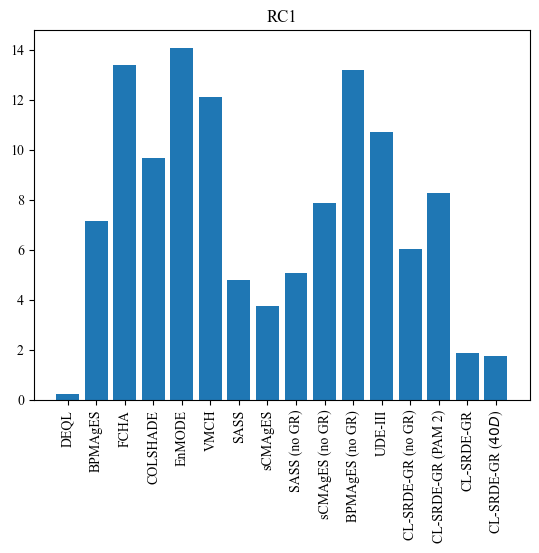

DEQL	7049.037	0.0
BPMAgES	7049.03695418	0.0
FCHA	7065.999	3.642028
COLSHADE	7049.037	0.0
EnMODE	7049.037	0.0
VMCH	7049.0345	0.44744642
SASS	7049.037	0.0
sCMAgES	7049.0369540456695	0.0
SASS (no GR)	7049.036953973955	0.0
sCMAgES (no GR)	7049.037	0.0
BPMAgES (no GR)	7552.92326135283	0.0
UDE-III	7049.036953962437	0.0
CL-SRDE-GR (no GR)	7049.036953962437	0.0
CL-SRDE-GR (PAM 2)	7049.036953962437	0.0
CL-SRDE-GR	7049.036953962437	0.0
CL-SRDE-GR ($40D$)	7049.036953962437	0.0


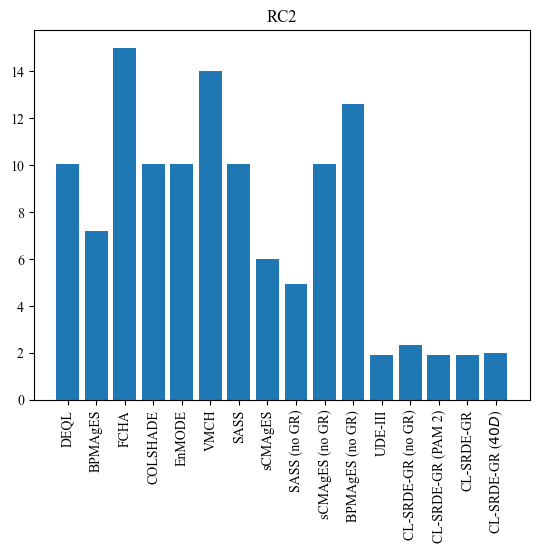

DEQL	-4529.119	0.0
BPMAgES	-140.89456474	0.0
FCHA	-18435.25	174.7154
COLSHADE	-4529.1197	0.0
EnMODE	-4529.1197	0.0
VMCH	-4525.8292	0.0
SASS	-142.71933	0.0
sCMAgES	-4427.245160116352	0.0
SASS (no GR)	-142.71931854411378	0.0
sCMAgES (no GR)	28.871353	0.0
BPMAgES (no GR)	-142.14319890226034	0.0
UDE-III	-142.69123350735936	0.0
CL-SRDE-GR (no GR)	76.26907039339312	0.0
CL-SRDE-GR (PAM 2)	76.26907039339312	0.0
CL-SRDE-GR	-142.7193290585201	0.0
CL-SRDE-GR ($40D$)	-142.71932904559617	0.0


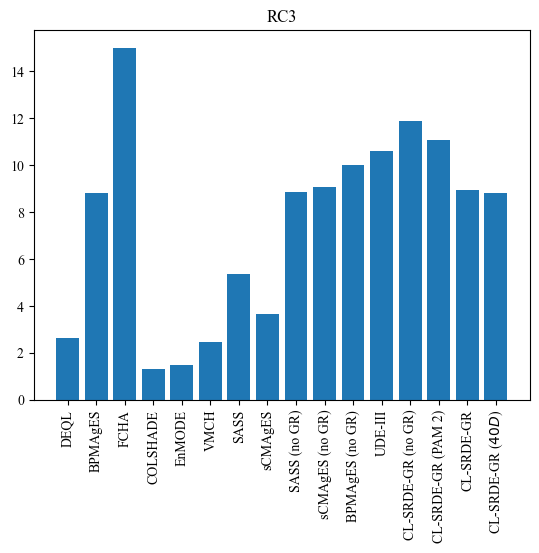

DEQL	-0.3615783	0.0
BPMAgES	-0.38669518	0.0
FCHA	-0.02366808	0.0
COLSHADE	-0.38826044	0.0
EnMODE	-0.37485438	0.0
VMCH	-0.21566453	0.0
SASS	-0.38826042	0.0
sCMAgES	-0.38823053743038016	0.0
SASS (no GR)	-0.37486161709652316	0.0
sCMAgES (no GR)	-0.37060134	0.0
BPMAgES (no GR)	-0.3720096018425535	0.0
UDE-III	-0.3748616290741848	0.0
CL-SRDE-GR (no GR)	-0.37486163221831137	0.0
CL-SRDE-GR (PAM 2)	-0.38826043623292233	0.0
CL-SRDE-GR	-0.37486163221831137	0.0
CL-SRDE-GR ($40D$)	-0.3748523151981481	0.0


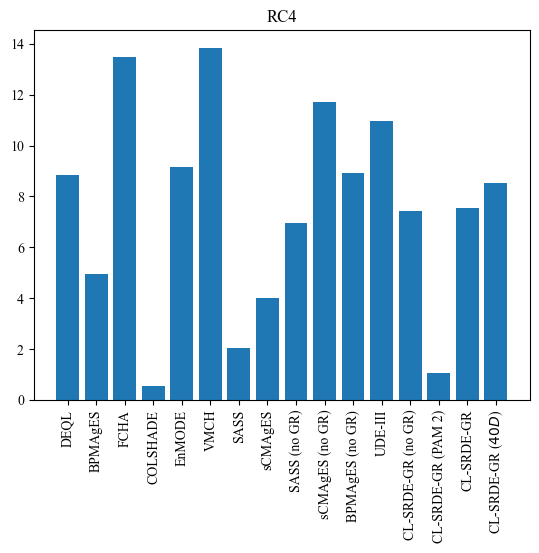

DEQL	0.0	0.0
BPMAgES	-130.82405282	0.0
FCHA	99.99699	0.0
COLSHADE	-391.07003	0.0
EnMODE	0.0	0.0
VMCH	-0.003	0.0
SASS	-400.00517	0.0
sCMAgES	-400.0001239764557	0.0
SASS (no GR)	-322.0842960848105	0.0
sCMAgES (no GR)	-204.82926	0.0
BPMAgES (no GR)	-234.21901648339326	0.0
UDE-III	-0.00962318552740625	0.0
CL-SRDE-GR (no GR)	-344.80225395194043	0.0
CL-SRDE-GR (PAM 2)	-268.62607197436944	0.0
CL-SRDE-GR	-374.929029312849	0.0
CL-SRDE-GR ($40D$)	-400.0055999999995	0.0


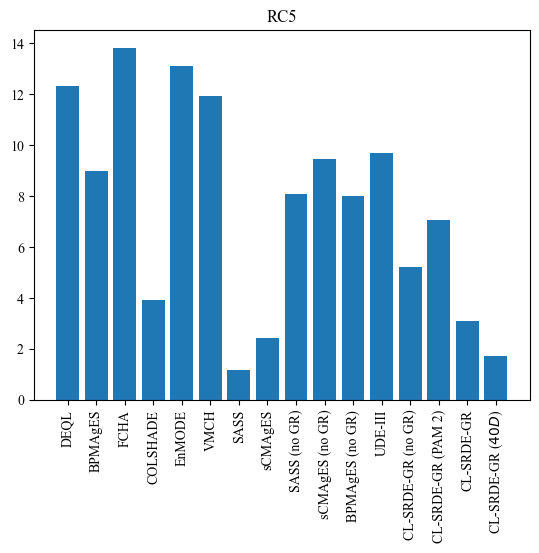

DEQL	1.085058	3.752428
BPMAgES	2.33758271	0.0
FCHA	0.9979001	82.77698
COLSHADE	2.1447569	0.021647034933
EnMODE	1.0770239	0.37355089
VMCH	2.3326992	0.096683783
SASS	1.8638829	0.0
sCMAgES	1.9666650582679717	0.0
SASS (no GR)	2.164525041405244	0.0
sCMAgES (no GR)	1.2817397	0.13168822
BPMAgES (no GR)	2.612064143734894	0.10811245580954569
UDE-III	0.9979	76.86641662498663
CL-SRDE-GR (no GR)	0.9979000000000003	0.0
CL-SRDE-GR (PAM 2)	1.2791070129057114	0.0
CL-SRDE-GR	1.533657601143694	0.0
CL-SRDE-GR ($40D$)	0.997901517	0.0


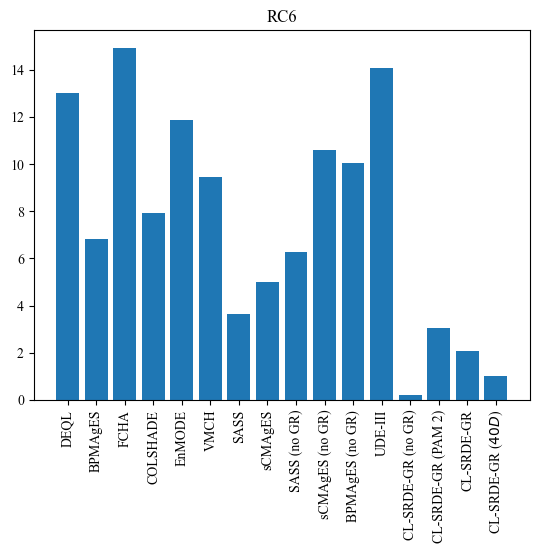

DEQL	1.687496	14.98421
BPMAgES	2.15371957	0.04028784
FCHA	0.486466	81.37297
COLSHADE	2.1830567	0.017892645575
EnMODE	1.1554696	0.51555652
VMCH	1.8763186	0.090311017
SASS	1.5682648	0.0
sCMAgES	2.0170955600460516	0.0
SASS (no GR)	2.224938130807445	0.0
sCMAgES (no GR)	1.9132992	0.096000791
BPMAgES (no GR)	2.0342095245955725	0.09813176679482702
UDE-III	0.48646599665048196	52.40694980558766
CL-SRDE-GR (no GR)	0.48646599653600264	0.0
CL-SRDE-GR (PAM 2)	1.7732210611159571	0.0
CL-SRDE-GR	1.4802648517344437	0.0
CL-SRDE-GR ($40D$)	1.194647826339545	0.0


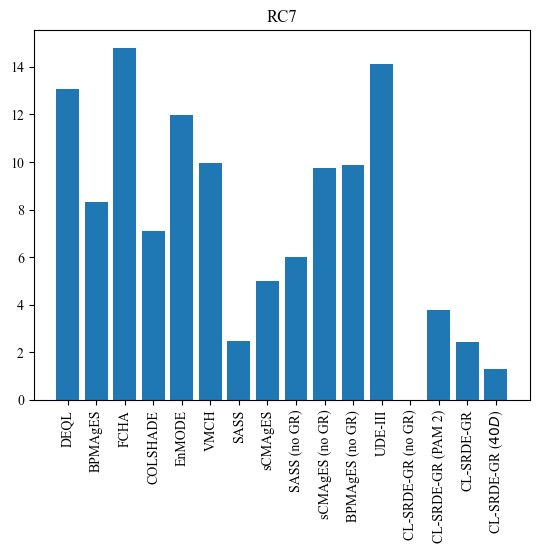

DEQL	2.0	0.0
BPMAgES	2.0	0.0
FCHA	2.0	0.0
COLSHADE	2.0	0.0
EnMODE	2.0	0.0
VMCH	2.0	0.0
SASS	2.0	0.0
sCMAgES	2.0	0.0
SASS (no GR)	2.0000000000026503	0.0
sCMAgES (no GR)	2.0	0.0
BPMAgES (no GR)	1.9999999999999998	0.0
UDE-III	1.9999999999999998	0.0
CL-SRDE-GR (no GR)	1.9999999999999998	0.0
CL-SRDE-GR (PAM 2)	1.9999999999999998	0.0
CL-SRDE-GR	1.9999999999999998	0.0
CL-SRDE-GR ($40D$)	1.9999999999999998	0.0


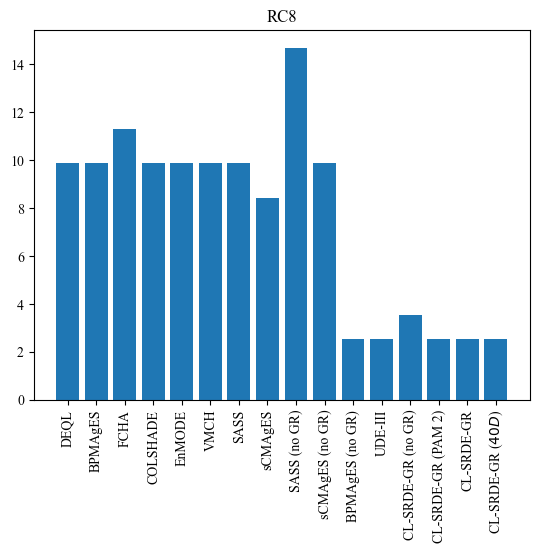

DEQL	2.557655	0.0
BPMAgES	2.55765457	0.0
FCHA	2.558861	0.0
COLSHADE	2.5576546	0.0
EnMODE	2.5576546	0.0
VMCH	2.5576546	0.0
SASS	2.5576546	0.0
sCMAgES	2.557654573998049	0.0
SASS (no GR)	2.557654574562967	0.0
sCMAgES (no GR)	2.5576546	0.0
BPMAgES (no GR)	2.5576545739550216	0.0
UDE-III	2.5576545739550216	0.0
CL-SRDE-GR (no GR)	2.5576545739550216	0.0
CL-SRDE-GR (PAM 2)	2.5576545739550216	0.0
CL-SRDE-GR	2.5576545739550216	0.0
CL-SRDE-GR ($40D$)	2.5576545739550216	0.0


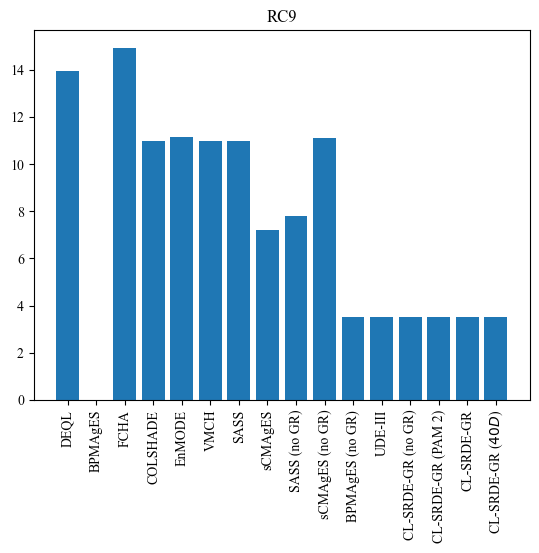

DEQL	1.076543	0.0
BPMAgES	1.07654308	0.0
FCHA	1.07663	0.0
COLSHADE	1.0765431	0.0
EnMODE	1.25	6.0110886e-06
VMCH	1.0765431	0.0
SASS	1.0765431	0.0
sCMAgES	1.076543083332263	0.0
SASS (no GR)	1.0765430841344623	0.0
sCMAgES (no GR)	1.0765431	0.0
BPMAgES (no GR)	1.0765430833322625	0.0
UDE-III	1.0765430833322625	0.0
CL-SRDE-GR (no GR)	1.0765430833322625	0.0
CL-SRDE-GR (PAM 2)	1.0765430833322625	0.0
CL-SRDE-GR	1.0765430833322625	0.0
CL-SRDE-GR ($40D$)	1.0765430833322625	0.0


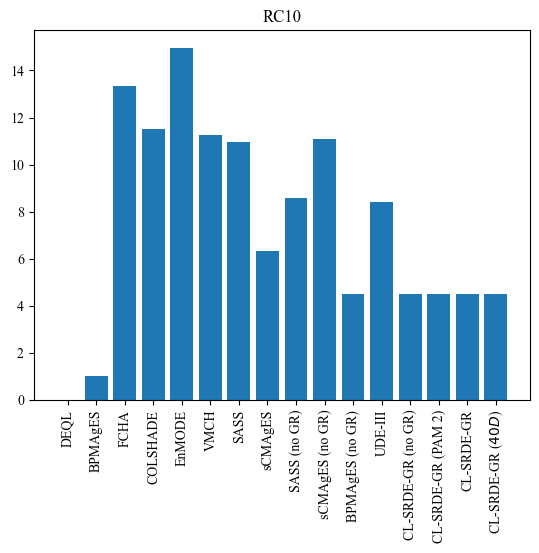

DEQL	99.23904	0.0
BPMAgES	112.39895339	0.0
FCHA	119.0516	0.002617942
COLSHADE	168.25298	0.125
EnMODE	107.37514	0.0
VMCH	128.33408	8.1442858e-05
SASS	99.238464	0.0
sCMAgES	99.23866548614205	0.0
SASS (no GR)	107.37691623745714	1.005254480271407e-10
sCMAgES (no GR)	99.560791	0.0
BPMAgES (no GR)	109.29429441244312	0.042726724564833785
UDE-III	99.23846365338443	0.0
CL-SRDE-GR (no GR)	107.37809959660439	5.156293021050825e-48
CL-SRDE-GR (PAM 2)	102.25514978364052	0.0
CL-SRDE-GR	99.2385813588927	0.0
CL-SRDE-GR ($40D$)	99.2385948031051	0.0


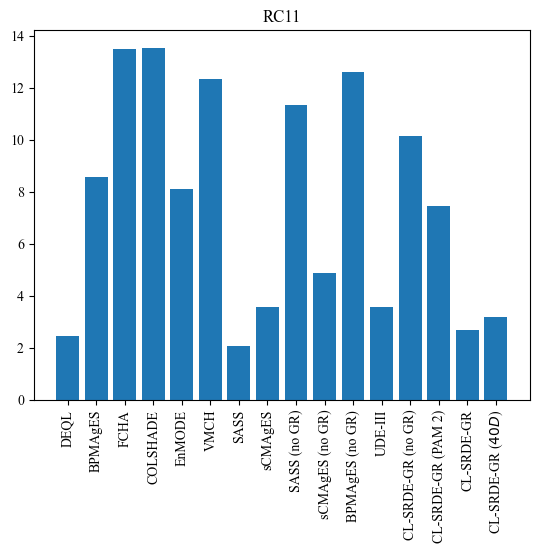

DEQL	2.924831	0.0
BPMAgES	2.9469611	0.0
FCHA	2.95786	0.0
COLSHADE	2.9248306	0.0
EnMODE	2.9248306	0.0
VMCH	11.645939	0.0
SASS	2.9248306	0.0
sCMAgES	2.9374913974167427	0.0
SASS (no GR)	2.9248305553480294	0.0
sCMAgES (no GR)	2.9256588	0.0
BPMAgES (no GR)	2.9252620681611754	0.0
UDE-III	2.9248305536633605	0.0
CL-SRDE-GR (no GR)	2.9469611000661917	0.0
CL-SRDE-GR (PAM 2)	2.9248305536633605	0.0
CL-SRDE-GR	2.9248305536633605	0.0
CL-SRDE-GR ($40D$)	2.9469611000661917	0.0


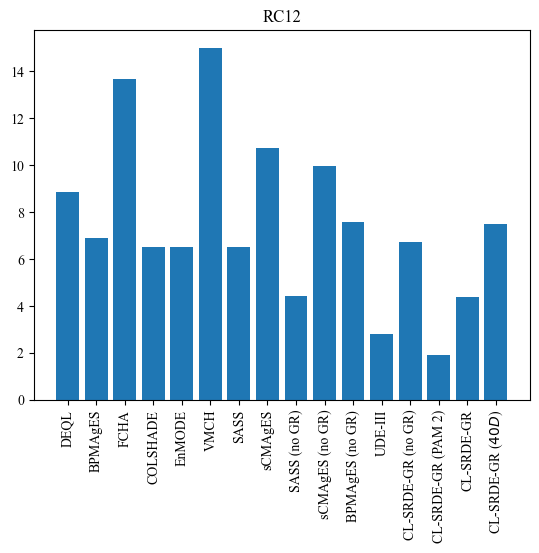

DEQL	26887.42	0.0
BPMAgES	26887.42221075	0.0
FCHA	26887.42	0.0
COLSHADE	26887.422	0.0
EnMODE	26887.422	0.0
VMCH	26887.422	0.0
SASS	26887.422	0.0
sCMAgES	26887.422210752055	0.0
SASS (no GR)	26887.422210753095	0.0
sCMAgES (no GR)	26887.422	0.0
BPMAgES (no GR)	26887.422210752055	0.0
UDE-III	26887.422210752055	0.0
CL-SRDE-GR (no GR)	26887.42221075206	0.0
CL-SRDE-GR (PAM 2)	26887.422210752055	0.0
CL-SRDE-GR	26887.422210752055	0.0
CL-SRDE-GR ($40D$)	26887.422210752055	0.0


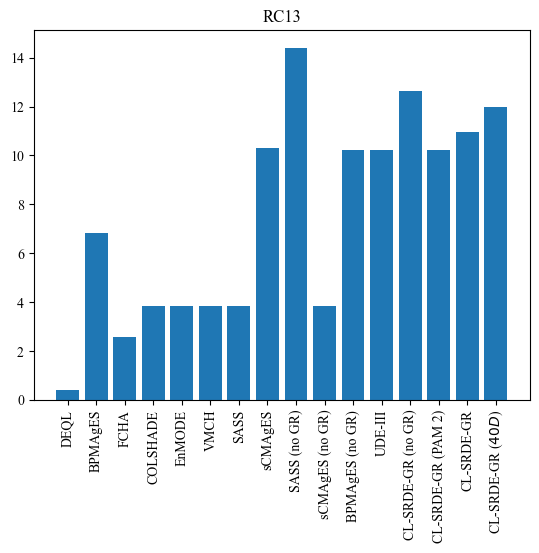

DEQL	53638.95	0.0
BPMAgES	58505.44989025	0.0
FCHA	75722.96	0.0
COLSHADE	58505.45	0.0
EnMODE	58505.45	0.0
VMCH	53672.393	0.0
SASS	58505.451	0.0
sCMAgES	54995.14997730729	0.0
SASS (no GR)	58505.450228331254	0.0
sCMAgES (no GR)	59689.448	0.0
BPMAgES (no GR)	58505.44989364284	0.0
UDE-III	67984.87060649336	0.0
CL-SRDE-GR (no GR)	58505.4498902454	0.0
CL-SRDE-GR (PAM 2)	58505.4498902454	0.0
CL-SRDE-GR	58505.4498902454	0.0
CL-SRDE-GR ($40D$)	53638.94272195391	0.0


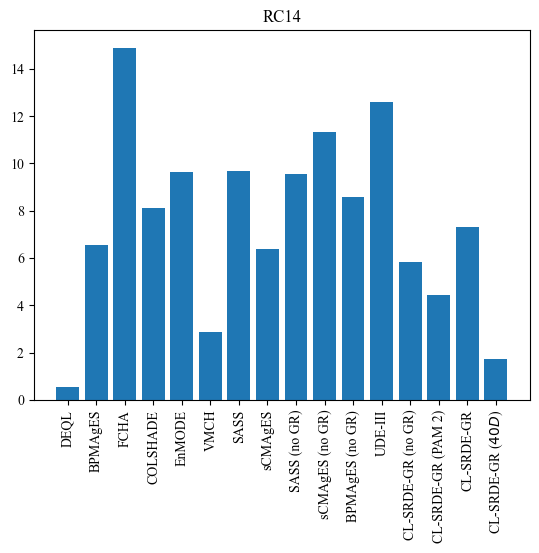

DEQL	2994.424	0.0
BPMAgES	2994.42446576	0.0
FCHA	3008.593	0.0
COLSHADE	2994.4245	0.0
EnMODE	2994.4245	0.0
VMCH	2994.4245	0.0
SASS	2994.4245	0.0
sCMAgES	2994.4244657567397	0.0
SASS (no GR)	2994.424465768512	0.0
sCMAgES (no GR)	2994.4245	0.0
BPMAgES (no GR)	2994.4244657567365	0.0
UDE-III	2994.424465756737	0.0
CL-SRDE-GR (no GR)	2994.424465756736	0.0
CL-SRDE-GR (PAM 2)	2994.424465756736	0.0
CL-SRDE-GR	2994.424465756736	0.0
CL-SRDE-GR ($40D$)	2994.424465756736	0.0


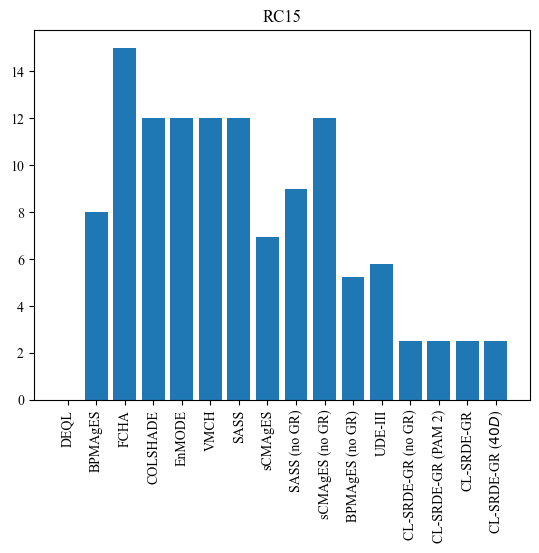

DEQL	0.032213	0.0
BPMAgES	0.04428166	0.0
FCHA	0.04583835	0.0
COLSHADE	0.032213001	0.0
EnMODE	0.032213001	0.0
VMCH	0.03221303	0.0
SASS	0.032213001	0.0
sCMAgES	0.03626631565006759	0.0
SASS (no GR)	0.03221303469920698	0.0
sCMAgES (no GR)	0.034962807	0.0
BPMAgES (no GR)	0.03221300088395667	0.0
UDE-III	0.032213000883957135	0.0
CL-SRDE-GR (no GR)	0.032213000883956636	0.0
CL-SRDE-GR (PAM 2)	0.032213000883956636	0.0
CL-SRDE-GR	0.032213000883956636	0.0
CL-SRDE-GR ($40D$)	0.032213000883956636	0.0


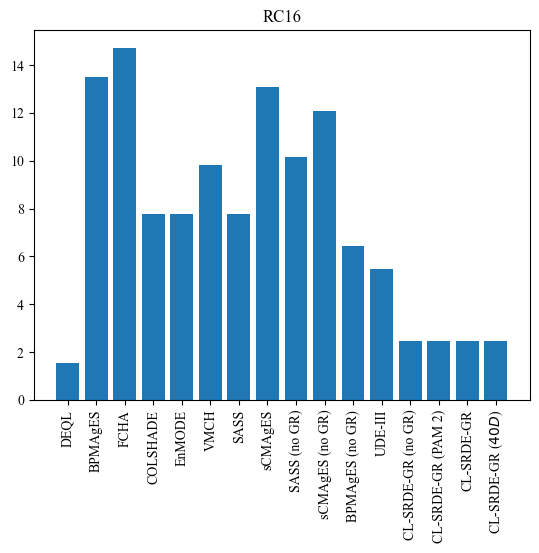

DEQL	0.01266523	0.0
BPMAgES	0.01266523	0.0
FCHA	0.0127094	0.0
COLSHADE	0.012665233	0.0
EnMODE	0.012719054	0.0
VMCH	0.012665233	0.0
SASS	0.012665233	0.0
sCMAgES	0.012665801372619372	0.0
SASS (no GR)	0.012665234292741027	0.0
sCMAgES (no GR)	0.01266615	0.0
BPMAgES (no GR)	0.012665232922440381	0.0
UDE-III	0.012666870564194957	0.0
CL-SRDE-GR (no GR)	0.012697881122478072	0.0
CL-SRDE-GR (PAM 2)	0.012665232788319405	0.0
CL-SRDE-GR	0.012665232788319405	0.0
CL-SRDE-GR ($40D$)	0.012665232788319405	0.0


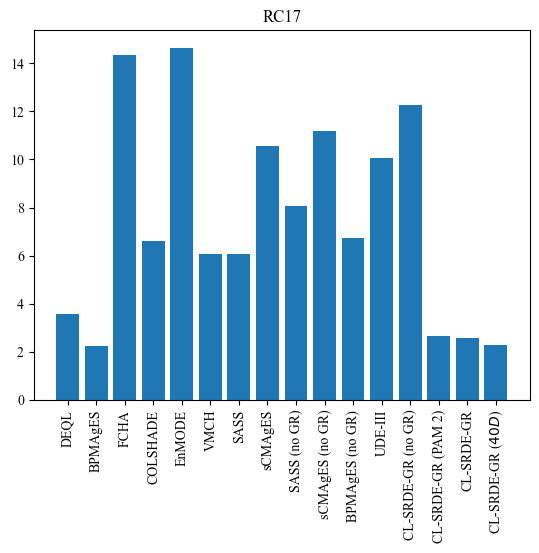

DEQL	10079.9	0.0
BPMAgES	6059.71433505	0.0
FCHA	6200.497	0.0
COLSHADE	6059.7143	0.0
EnMODE	6059.7143	0.0
VMCH	6059.7143	0.0
SASS	6059.7143	0.0
sCMAgES	6063.763184968418	0.0
SASS (no GR)	6059.7143350492715	0.0
sCMAgES (no GR)	6059.7143	0.0
BPMAgES (no GR)	6059.714335048436	0.0
UDE-III	6059.714335048436	0.0
CL-SRDE-GR (no GR)	14160.372451440895	0.0
CL-SRDE-GR (PAM 2)	15181.782989687497	0.0
CL-SRDE-GR	14123.604562453073	0.0
CL-SRDE-GR ($40D$)	16420.22533529805	0.0


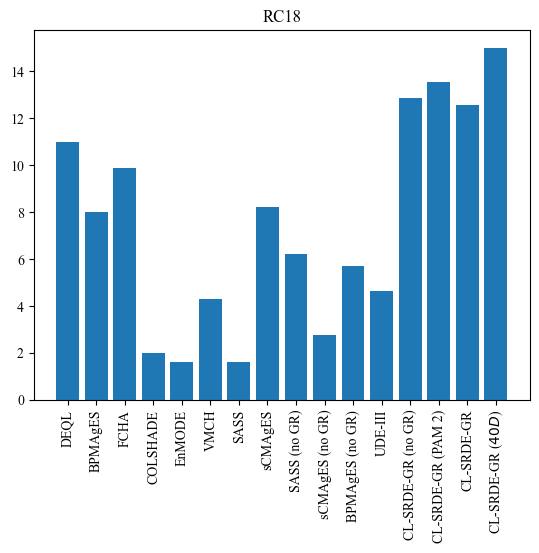

DEQL	1.670218	0.0
BPMAgES	1.67021773	0.0
FCHA	1.683643	0.0
COLSHADE	1.6702177	0.0
EnMODE	1.670272	0.0
VMCH	1.6702177	0.0
SASS	1.6702177	0.0
sCMAgES	1.670217726279864	0.0
SASS (no GR)	1.6702177318557205	0.0
sCMAgES (no GR)	1.6702177	0.0
BPMAgES (no GR)	1.6702177262798563	0.0
UDE-III	1.670217726279965	0.0
CL-SRDE-GR (no GR)	1.6702177262798563	0.0
CL-SRDE-GR (PAM 2)	1.6702177262798563	0.0
CL-SRDE-GR	1.6702177262798563	0.0
CL-SRDE-GR ($40D$)	1.6702177262798563	0.0


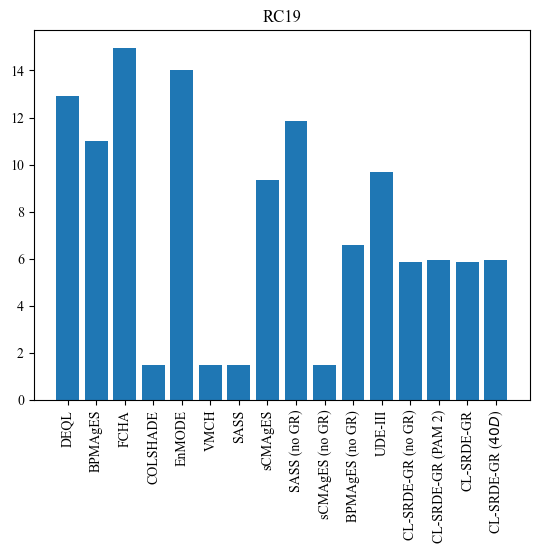

DEQL	263.8958	0.0
BPMAgES	263.89584338	0.0
FCHA	263.9083	0.0
COLSHADE	263.89584	0.0
EnMODE	263.89584	0.0
VMCH	263.89584	0.0
SASS	263.89584	0.0
sCMAgES	263.8958433764684	0.0
SASS (no GR)	263.89584337658613	0.0
sCMAgES (no GR)	263.89668	0.0
BPMAgES (no GR)	263.89584337646835	0.0
UDE-III	263.89584337646835	0.0
CL-SRDE-GR (no GR)	263.89584337646835	0.0
CL-SRDE-GR (PAM 2)	263.89584337646835	0.0
CL-SRDE-GR	263.89584337646835	0.0
CL-SRDE-GR ($40D$)	263.89584337646835	0.0


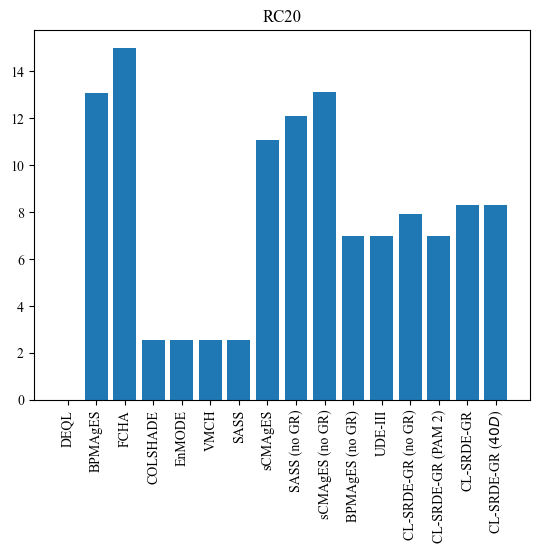

DEQL	0.2352425	0.0
BPMAgES	0.23524246	0.0
FCHA	0.2352425	0.0
COLSHADE	0.23524246	0.0
EnMODE	0.23524246	0.0
VMCH	0.23524246	0.0
SASS	0.23524246	0.0
sCMAgES	0.2352424579008037	0.0
SASS (no GR)	0.23524245958690138	0.0
sCMAgES (no GR)	0.23524246	0.0
BPMAgES (no GR)	0.2352424579008037	0.0
UDE-III	0.2352424579008037	0.0
CL-SRDE-GR (no GR)	0.2352424579008037	0.0
CL-SRDE-GR (PAM 2)	0.2352424579008037	0.0
CL-SRDE-GR	0.2352424579008037	0.0
CL-SRDE-GR ($40D$)	0.2352424579008037	0.0


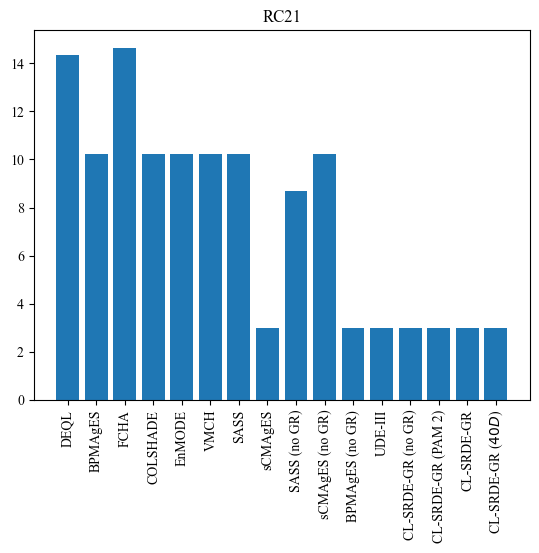

DEQL	-0.04740975	0.0
BPMAgES	0.5276115	0.0
FCHA	0.5273469	0.0
COLSHADE	0.53	0.0
EnMODE	0.53857143	0.0
VMCH	0.5268955	0.0
SASS	0.76003766	0.0
sCMAgES	0.5300000000000002	0.0
SASS (no GR)	0.9410650887573964	0.0
sCMAgES (no GR)	0.52804725	0.0
BPMAgES (no GR)	0.5281864235055724	0.0
UDE-III	0.5262805662805661	0.0
CL-SRDE-GR (no GR)	0.5257687074829931	0.0
CL-SRDE-GR (PAM 2)	0.5257687074829931	0.0
CL-SRDE-GR	0.5257687074829931	0.0
CL-SRDE-GR ($40D$)	0.5257687074829931	0.0


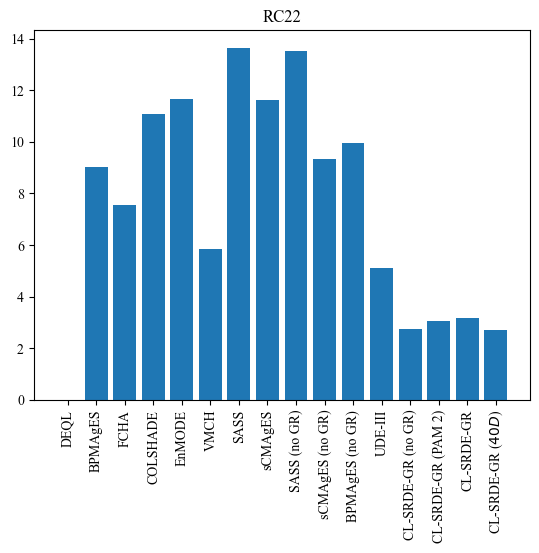

DEQL	16.06987	0.0
BPMAgES	16.06986873	0.0
FCHA	17.7196	0.0
COLSHADE	16.069869	0.0
EnMODE	16.136197	9.6656297e-06
VMCH	16.069869	0.0
SASS	16.069869	0.0
sCMAgES	16.07181103041887	0.0
SASS (no GR)	16.069868734796938	0.0
sCMAgES (no GR)	16.205669	0.0
BPMAgES (no GR)	16.06986872512227	0.0
UDE-III	16.06986872559276	0.0
CL-SRDE-GR (no GR)	16.06986872512227	0.0
CL-SRDE-GR (PAM 2)	16.06986872512227	0.0
CL-SRDE-GR	16.06986872512227	0.0
CL-SRDE-GR ($40D$)	16.06986872512227	0.0


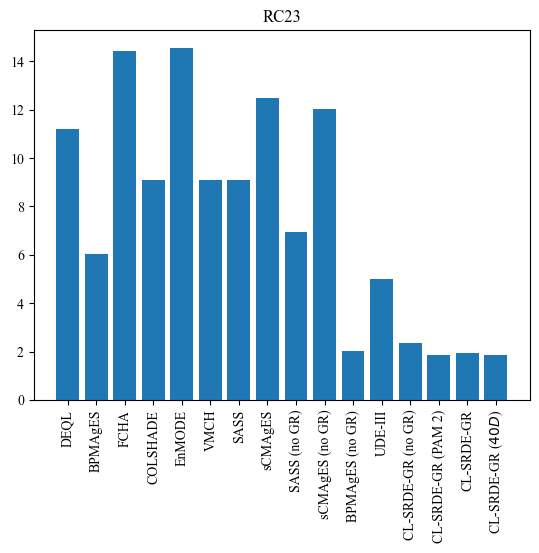

DEQL	nan	0.0
BPMAgES	2.54784305	0.0
FCHA	2.62599	0.0
COLSHADE	2.5437856	0.0
EnMODE	2.5437856	0.0
VMCH	2.5884807	0.0
SASS	2.5437856	0.0
sCMAgES	2.7854149587517014	0.0
SASS (no GR)	2.543785584619158	0.0
sCMAgES (no GR)	2.820227	0.0
BPMAgES (no GR)	2.547367551209703	0.0
UDE-III	2.543785566756739	0.0
CL-SRDE-GR (no GR)	2.5437855667553038	0.0
CL-SRDE-GR (PAM 2)	2.5437855667553464	0.0
CL-SRDE-GR	2.543785566755318	0.0
CL-SRDE-GR ($40D$)	2.5437855667552896	0.0


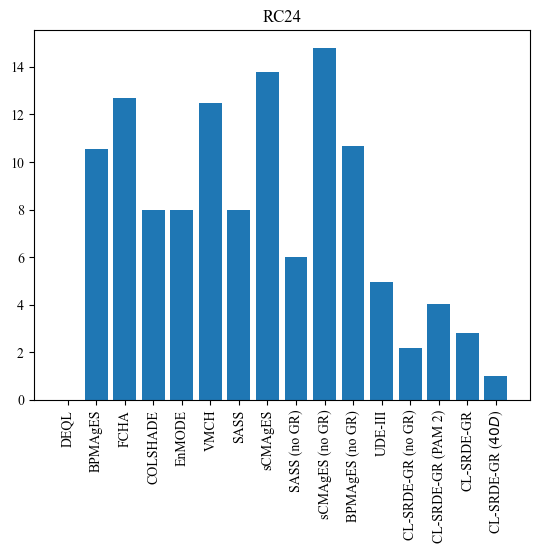

DEQL	1631.013	0.0
BPMAgES	1691.04313783	0.0
FCHA	2585.258	0.0
COLSHADE	1616.1198	0.0
EnMODE	1783.4759	0.0
VMCH	1635.5716	0.0
SASS	1616.1198	0.0
sCMAgES	3174.5388730243376	0.0
SASS (no GR)	1616.1197832004564	0.0
sCMAgES (no GR)	3278.8352	0.0
BPMAgES (no GR)	2007.9214387736165	0.0
UDE-III	259.5893915813538	0.0010517398409042947
CL-SRDE-GR (no GR)	1674.3602618695234	0.0
CL-SRDE-GR (PAM 2)	1616.119765229458	0.0
CL-SRDE-GR	1616.1197650507565	0.0
CL-SRDE-GR ($40D$)	2011.8677972459782	0.0


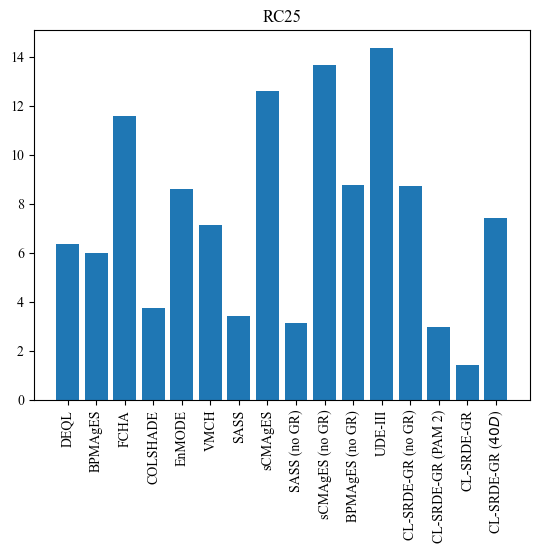

DEQL	37.3426	0.0
BPMAgES	45.78336859	0.0
FCHA	25.69627	20.56428
COLSHADE	36.249291	0.0
EnMODE	37.354503	0.0
VMCH	52.391752	0.0
SASS	38.129703	0.0
sCMAgES	49.55042327650312	0.0
SASS (no GR)	38.66939738700561	0.0
sCMAgES (no GR)	49.63945	0.0
BPMAgES (no GR)	47.18022760258353	0.0
UDE-III	54.47438912840758	0.0
CL-SRDE-GR (no GR)	36.25705658343465	0.0
CL-SRDE-GR (PAM 2)	36.251868224758695	0.0
CL-SRDE-GR	36.60465128197489	0.0
CL-SRDE-GR ($40D$)	44.65551958251154	1.2965001637217117


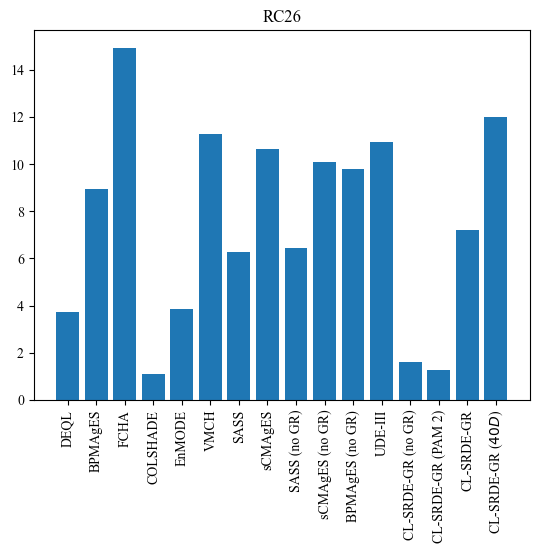

DEQL	nan	12345.0
BPMAgES	524.45076065	0.0
FCHA	537.6655	0.0
COLSHADE	524.45076	0.0
EnMODE	530.57432	0.0
VMCH	524.45176	0.0
SASS	524.46946	0.0
sCMAgES	524.6956179099611	0.0
SASS (no GR)	524.4660227928152	0.0
sCMAgES (no GR)	524.60997	0.0
BPMAgES (no GR)	530.5743178014222	0.0
UDE-III	524.4508942669166	0.0
CL-SRDE-GR (no GR)	524.450760646605	0.0
CL-SRDE-GR (PAM 2)	524.4507606466066	0.0
CL-SRDE-GR	524.450760646605	0.0
CL-SRDE-GR ($40D$)	524.4507606466044	0.0


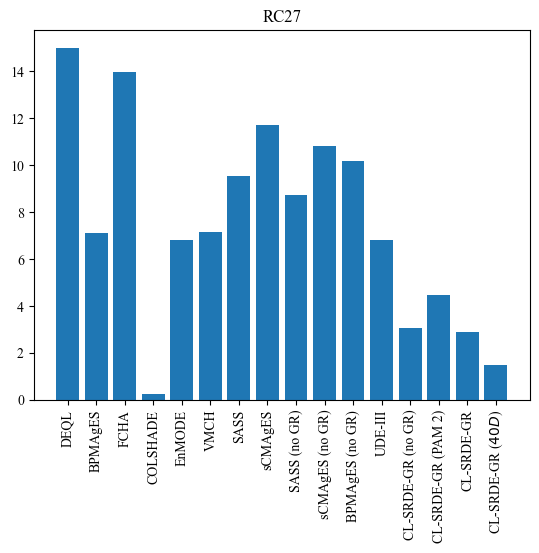

DEQL	14614.14	0.0
BPMAgES	14614.13571503	0.0
FCHA	14615.99	0.0
COLSHADE	16958.202	0.0
EnMODE	16958.202	0.0
VMCH	16958.202	0.0
SASS	14614.136	0.0
sCMAgES	14614.135715026465	0.0
SASS (no GR)	14614.135715034992	0.0
sCMAgES (no GR)	14614.136	0.0
BPMAgES (no GR)	14614.135715026452	0.0
UDE-III	14614.135715026452	0.0
CL-SRDE-GR (no GR)	16958.202286942123	0.0
CL-SRDE-GR (PAM 2)	16958.202286942123	0.0
CL-SRDE-GR	16958.202286942123	0.0
CL-SRDE-GR ($40D$)	16958.202286942123	0.0


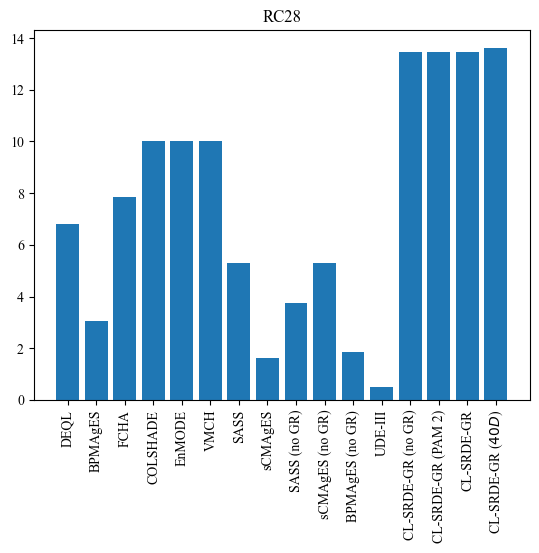

DEQL	2964895.0	0.0
BPMAgES	2964895.41733916	0.0
FCHA	2964895.0	0.0
COLSHADE	2964895.4	0.0
EnMODE	2964895.4	0.0
VMCH	2964895.4	0.0
SASS	2964895.4	0.0
sCMAgES	2964898.733857734	0.0
SASS (no GR)	2964895.4173391648	0.0
sCMAgES (no GR)	2964922.6	0.0
BPMAgES (no GR)	2964895.417339159	0.0
UDE-III	2964895.417339159	0.0
CL-SRDE-GR (no GR)	2964895.417339159	0.0
CL-SRDE-GR (PAM 2)	2964895.417339159	0.0
CL-SRDE-GR	2964895.417339159	0.0
CL-SRDE-GR ($40D$)	2964895.417339159	0.0


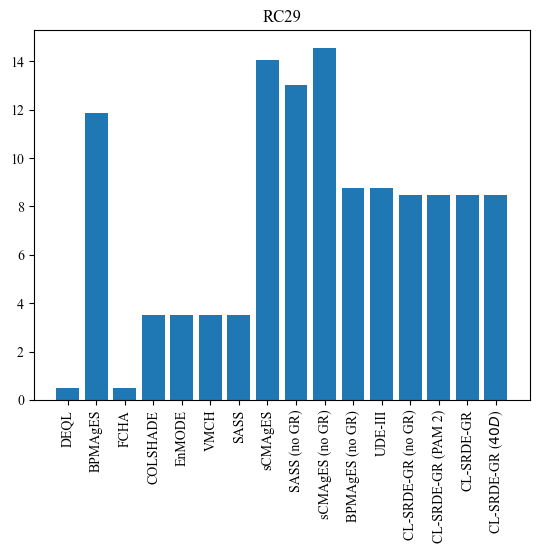

DEQL	2.658559	0.0
BPMAgES	2.61388406	0.0
FCHA	2.858221	0.0
COLSHADE	2.6585592	0.0
EnMODE	2.6585592	0.0
VMCH	2.6585592	0.0
SASS	2.6585592	0.0
sCMAgES	3.878629281125598	0.0
SASS (no GR)	2.658559165986082	0.0
sCMAgES (no GR)	3.5368984	0.0
BPMAgES (no GR)	2.6138840583331615	0.0
UDE-III	2.613884585152932	0.0
CL-SRDE-GR (no GR)	2.6585592481863203	0.0
CL-SRDE-GR (PAM 2)	2.6585591659743453	0.0
CL-SRDE-GR	2.909619185177296	0.0
CL-SRDE-GR ($40D$)	2.909619184984756	0.0


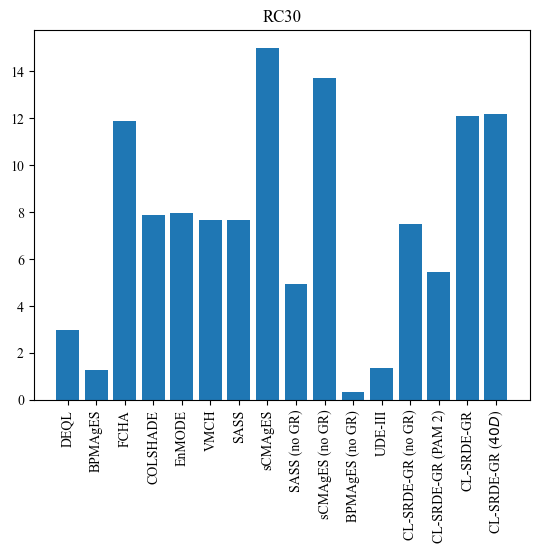

DEQL	4.74e-15	0.0
BPMAgES	0.0	0.0
FCHA	2.749081e-20	0.0
COLSHADE	0.0	0.0
EnMODE	3.4102969e-19	0.0
VMCH	2.2809251e-15	0.0
SASS	0.0	0.0
sCMAgES	0.0	0.0
SASS (no GR)	2.6668131070639475e-16	0.0
sCMAgES (no GR)	0.0	0.0
BPMAgES (no GR)	0.0	0.0
UDE-III	5.288141404100697e-29	0.0
CL-SRDE-GR (no GR)	1.827726075484431e-25	0.0
CL-SRDE-GR (PAM 2)	0.0	0.0
CL-SRDE-GR	0.0	0.0
CL-SRDE-GR ($40D$)	0.0	0.0


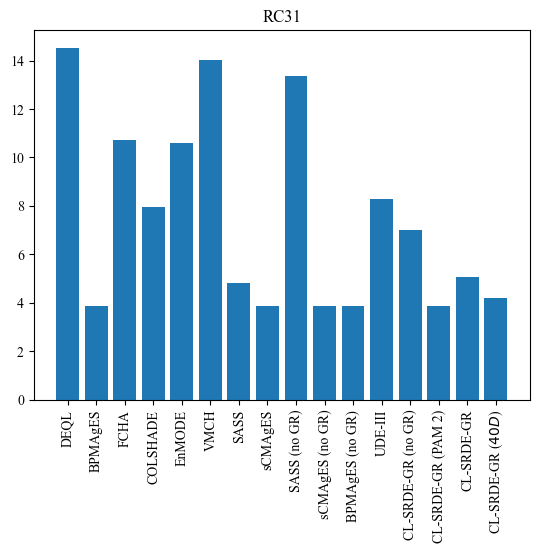

DEQL	-30665.54	0.0
BPMAgES	-30665.53867178	0.0
FCHA	-30664.87	0.0
COLSHADE	-30665.539	0.0
EnMODE	-30665.539	0.0
VMCH	-30665.539	0.0
SASS	-30665.539	0.0
sCMAgES	-30665.538671783288	0.0
SASS (no GR)	-30665.53867177746	0.0
sCMAgES (no GR)	-30665.539	0.0
BPMAgES (no GR)	-30665.538671783324	0.0
UDE-III	-30665.538671783324	0.0
CL-SRDE-GR (no GR)	-30665.538671783328	0.0
CL-SRDE-GR (PAM 2)	-30665.538671783328	0.0
CL-SRDE-GR	-30665.538671783328	0.0
CL-SRDE-GR ($40D$)	-30665.538671783328	0.0


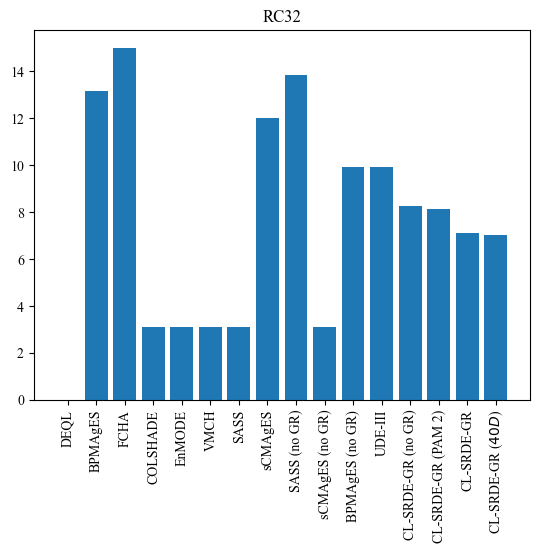

DEQL	nan	nan
BPMAgES	2.64718525	0.0
FCHA	2.639346	0.0
COLSHADE	2.6393465	0.0
EnMODE	2.6393465	0.0
VMCH	2.6393465	0.0
SASS	2.6393465	0.0
sCMAgES	2.639346497036031	0.0
SASS (no GR)	2.63934650988932	0.0
sCMAgES (no GR)	2.6393465	0.0
BPMAgES (no GR)	2.6493856243532243	0.0
UDE-III	2.639346497036027	0.0
CL-SRDE-GR (no GR)	2.6393464970359695	0.0
CL-SRDE-GR (PAM 2)	2.639346497036002	0.0
CL-SRDE-GR	2.6393464970359664	0.0
CL-SRDE-GR ($40D$)	2.639346497035966	0.0


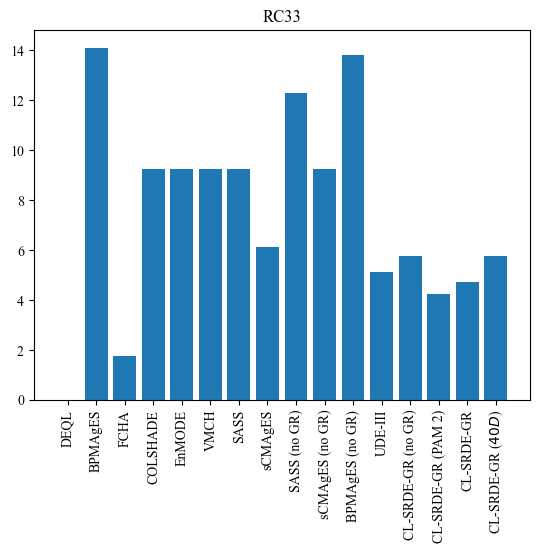

DEQL	nan	nan
BPMAgES	0.46677552	0.0
FCHA	22.03374	65.30372
COLSHADE	3.1904228	0.004479841892
EnMODE	8.1175546e-07	0.23505936
VMCH	14.722467	0.061312198
SASS	4.9036515e-16	0.0
sCMAgES	1.05506562850264	0.0
SASS (no GR)	5.341898884122569	0.0
sCMAgES (no GR)	4.841766	0.049743482
BPMAgES (no GR)	6.460789685958886	0.019372611112147612
UDE-III	15.136761136826015	8.468382536428969
CL-SRDE-GR (no GR)	1.1003938297640052	0.0
CL-SRDE-GR (PAM 2)	3.1090580439919813e-16	0.0
CL-SRDE-GR	2.661806870404702e-16	0.0
CL-SRDE-GR ($40D$)	2.692534285946205e-16	0.0


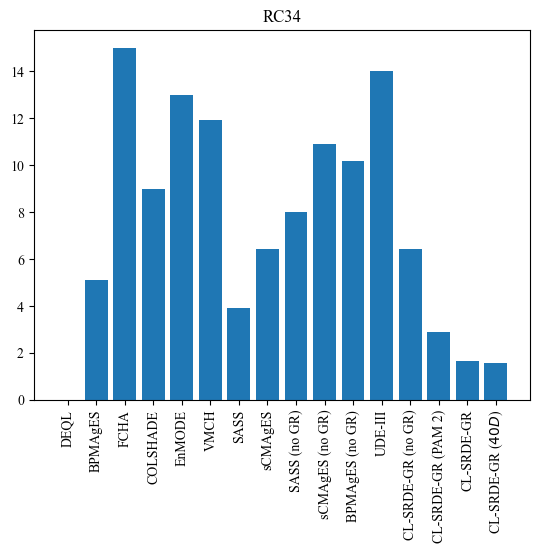

DEQL	nan	nan
BPMAgES	0.09014867	0.0
FCHA	-174.5606	3100.023
COLSHADE	111.05303	0.10341729118
EnMODE	-68.613374	4.0374304
VMCH	197.1583	0.84463294
SASS	0.080367917	0.0
sCMAgES	0.09346996175301847	0.0
SASS (no GR)	0.23220747595349955	0.0
sCMAgES (no GR)	100.07913	1.4747521
BPMAgES (no GR)	117.11132608421481	0.8918171275486853
UDE-III	118.53726846609729	2169.387588972237
CL-SRDE-GR (no GR)	-721.6574771479789	0.0
CL-SRDE-GR (PAM 2)	0.07682914265828378	0.0
CL-SRDE-GR	0.0768494476574183	0.0
CL-SRDE-GR ($40D$)	0.07686176942951617	0.0


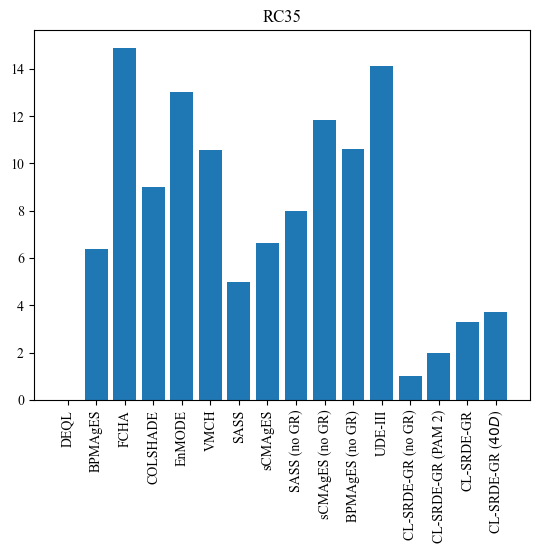

DEQL	nan	nan
BPMAgES	0.08754024	0.0
FCHA	7.46099	2846.677
COLSHADE	88.632283	0.13463013179
EnMODE	-106.08516	6.8642255
VMCH	125.9346	0.92324091
SASS	0.047892499	0.0
sCMAgES	0.0646004233190548	0.0
SASS (no GR)	0.6418099029029873	0.0
sCMAgES (no GR)	92.437276	1.417732
BPMAgES (no GR)	56.57103396603518	0.9761685729907931
UDE-III	-9.405363895422887	421.69821793297257
CL-SRDE-GR (no GR)	-25.531584267568785	0.0
CL-SRDE-GR (PAM 2)	0.04428446587795726	0.0
CL-SRDE-GR	0.04432740344054659	0.0
CL-SRDE-GR ($40D$)	0.04433480369816059	0.0


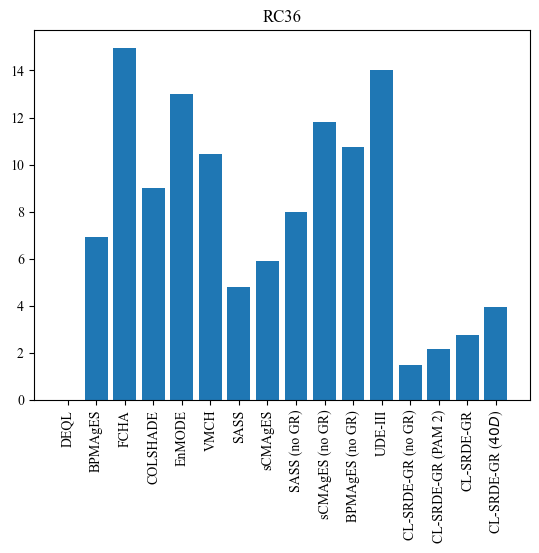

DEQL	nan	nan
BPMAgES	0.06097258	0.0
FCHA	-23.85343	135.4783
COLSHADE	2.5355763	0.015124802513
EnMODE	-19.814204	0.46121581
VMCH	4.392946	0.066968092
SASS	0.018722219	0.0
sCMAgES	0.09619617954238326	0.0
SASS (no GR)	2.103166835450123	0.0
sCMAgES (no GR)	4.5060797	0.1006488
BPMAgES (no GR)	4.704075469679063	0.05701170763460223
UDE-III	-29.89776849762593	69.81731373419976
CL-SRDE-GR (no GR)	-39.57584399075926	0.0
CL-SRDE-GR (PAM 2)	0.09239010635345646	0.0
CL-SRDE-GR	0.19483303779926375	0.0
CL-SRDE-GR ($40D$)	0.22539908535091302	0.0


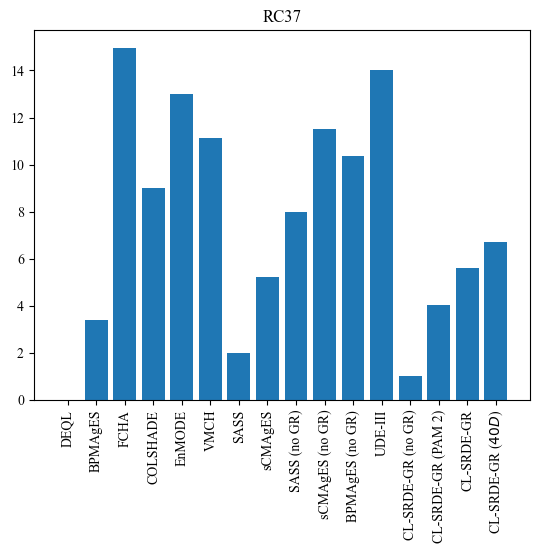

DEQL	nan	nan
BPMAgES	4.42958129	0.0
FCHA	-19.75445	125.5465
COLSHADE	8.874342	0.013913526998
EnMODE	0.96251281	0.18095916
VMCH	8.290143	0.072230583
SASS	2.7154181	0.0
sCMAgES	4.117465762539635	0.0
SASS (no GR)	9.106002983798653	0.0
sCMAgES (no GR)	17.916605	0.10001974
BPMAgES (no GR)	8.332465229545704	0.06083043538207074
UDE-III	-31.90661495137731	58.673414844791395
CL-SRDE-GR (no GR)	-31.90661495140987	0.0
CL-SRDE-GR (PAM 2)	2.727937935844339	0.0
CL-SRDE-GR	2.7110303049812665	0.0
CL-SRDE-GR ($40D$)	2.8822256340041603	0.0


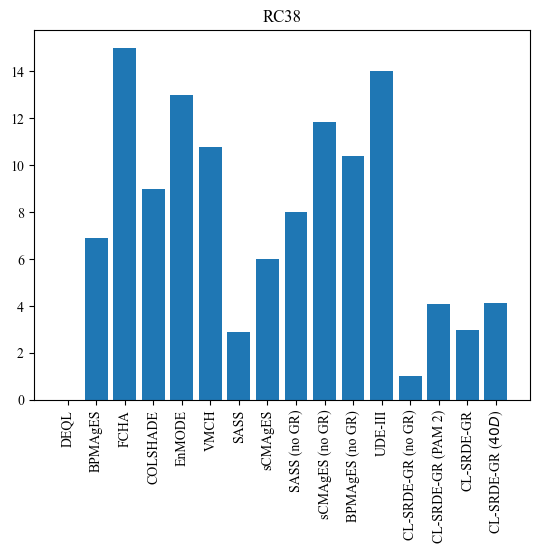

DEQL	nan	nan
BPMAgES	4.14689552	0.0
FCHA	-39.87184	132.5414
COLSHADE	8.2166079	0.014769531841
EnMODE	-3.4447394	0.16774077
VMCH	10.018973	0.068748659
SASS	2.7542047	0.0
sCMAgES	4.216314480708133	0.0
SASS (no GR)	10.323110500238995	0.0
sCMAgES (no GR)	6.2817155	0.08582355
BPMAgES (no GR)	11.067672197020956	0.056514242131300754
UDE-III	-48.26732480140545	58.916034939053255
CL-SRDE-GR (no GR)	-48.26732480140939	0.0
CL-SRDE-GR (PAM 2)	3.1032284551738796	0.0
CL-SRDE-GR	3.362353106117649	0.0
CL-SRDE-GR ($40D$)	3.958860344788849	0.0


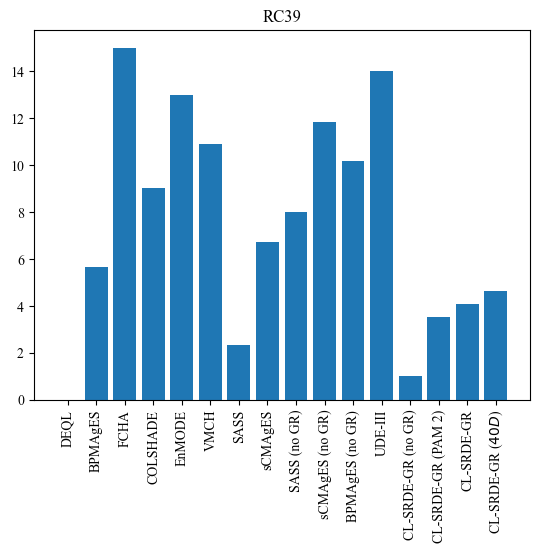

DEQL	nan	nan
BPMAgES	0.0	0.0
FCHA	1358.335	685.971
COLSHADE	37.407837	0.86928889984
EnMODE	9.7071716	1.6391687
VMCH	373.56926	2.7746724
SASS	3.7597997e-28	0.0
sCMAgES	1.386082885491496e-27	0.0
SASS (no GR)	0.012642977586491215	0.019119227315750494
sCMAgES (no GR)	817.66699	2.5216554
BPMAgES (no GR)	123.67204789977444	0.9439980922631733
UDE-III	145.0885270659826	143.51903745307737
CL-SRDE-GR (no GR)	21.144061162350088	0.0
CL-SRDE-GR (PAM 2)	6.248653100735188e-15	0.0
CL-SRDE-GR	2.2437798412696756e-14	0.0
CL-SRDE-GR ($40D$)	5.68362098697407e-13	0.0


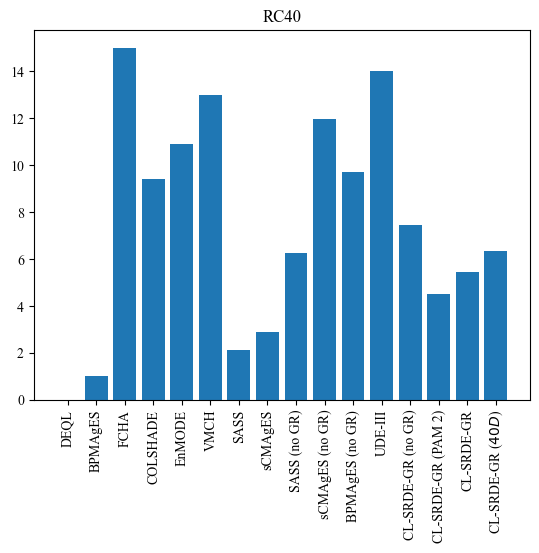

DEQL	nan	nan
BPMAgES	0.0	0.0
FCHA	5163.918	1113.927
COLSHADE	45.356177	0.61677874466
EnMODE	0.22663755	0.45199752
VMCH	655.41722	2.652248
SASS	1.4449856e-26	0.0
sCMAgES	3.434324575817265e-26	0.0
SASS (no GR)	1.277710976255134e-25	0.0
sCMAgES (no GR)	195.95607	3.2538703
BPMAgES (no GR)	303.33207536751206	1.665433669490957
UDE-III	143.56409674432064	117.07254576281372
CL-SRDE-GR (no GR)	55.54859707595311	0.0
CL-SRDE-GR (PAM 2)	3.7617242735123716e-20	0.0
CL-SRDE-GR	3.73665916152376e-21	0.0
CL-SRDE-GR ($40D$)	7.218315733650835e-20	0.0


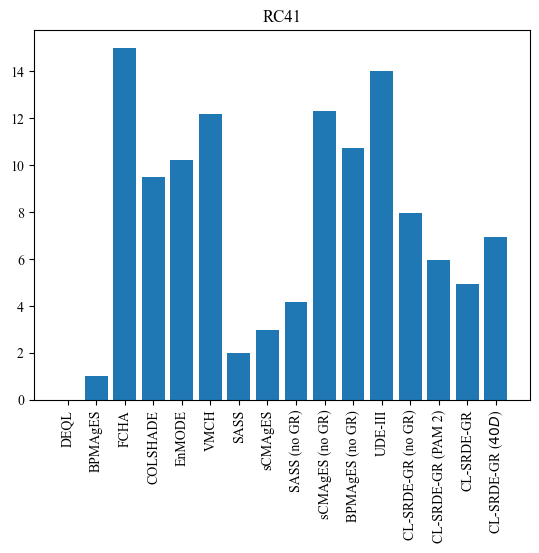

DEQL	nan	nan
BPMAgES	0.29657771	0.0
FCHA	-1505.498	5018.586
COLSHADE	-1.6088937	1.0258493734
EnMODE	-151.56496	5.5765288
VMCH	-1.1318994	2.7147572
SASS	0.087494409	0.0
sCMAgES	0.15532017152445798	0.0
SASS (no GR)	102.75409622326295	0.0
sCMAgES (no GR)	-10.358177	2.0168853
BPMAgES (no GR)	82.67949295476988	1.3443081628918943
UDE-III	-1737.4155245380723	2438.5358734645415
CL-SRDE-GR (no GR)	-1705.709368452001	0.0
CL-SRDE-GR (PAM 2)	0.08424791188447434	0.0
CL-SRDE-GR	0.13365445487093708	0.0
CL-SRDE-GR ($40D$)	0.12003737572392459	0.0


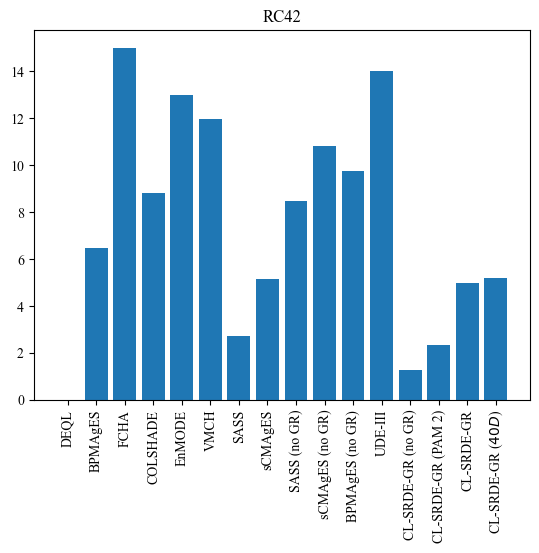

DEQL	nan	nan
BPMAgES	0.44735787	0.0
FCHA	-1631.013	5012.761
COLSHADE	19.797358	1.0737044357
EnMODE	-292.30832	7.5725477
VMCH	43.45463	2.8997905
SASS	0.080971227	0.0
sCMAgES	0.16878190219603428	0.0
SASS (no GR)	-1.6448568313306846	0.050013675601360184
sCMAgES (no GR)	13.530491	2.3468918
BPMAgES (no GR)	102.03921445638926	1.463698029020543
UDE-III	-472.8978653394216	1196.6469748265727
CL-SRDE-GR (no GR)	-558.1467062160452	0.0
CL-SRDE-GR (PAM 2)	0.07804793765394669	0.0
CL-SRDE-GR	44.34591495139944	0.0
CL-SRDE-GR ($40D$)	35.60185758539251	0.0


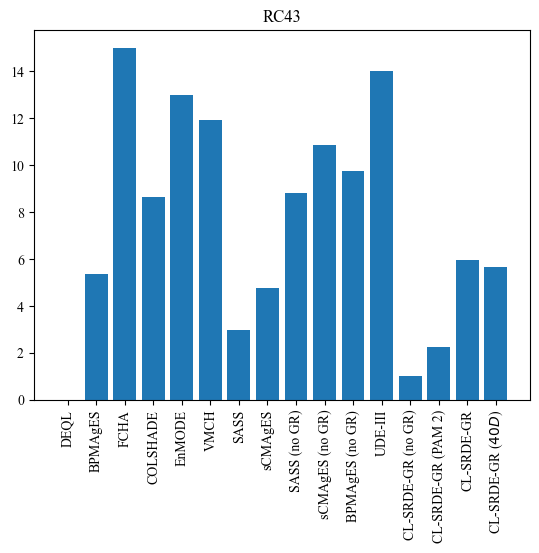

DEQL	nan	nan
BPMAgES	-5895.08621602	0.0
FCHA	-6081.473	0.0
COLSHADE	-5975.6495	0.0
EnMODE	-5889.9075	0.0
VMCH	-6241.0556	0.0
SASS	-6114.8504	0.0
sCMAgES	-6073.556896182844	0.0
SASS (no GR)	-6115.58709426915	0.0
sCMAgES (no GR)	-6128.8462	0.0
BPMAgES (no GR)	-5874.578109575534	0.0
UDE-III	-6094.290280965291	0.0
CL-SRDE-GR (no GR)	-6211.126735042736	0.0
CL-SRDE-GR (PAM 2)	-6223.49536595843	0.0
CL-SRDE-GR	-6176.230160526087	0.0
CL-SRDE-GR ($40D$)	-6179.832483553859	0.0


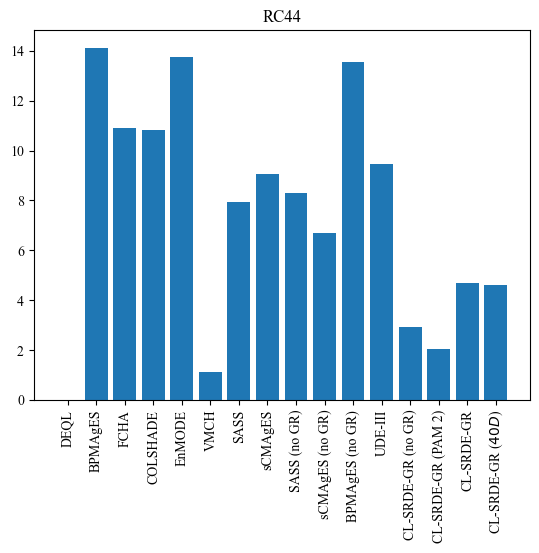

DEQL	0.08818269	0.0
BPMAgES	0.0504062	0.0
FCHA	0.5912402	0.0001885856
COLSHADE	0.041372244	0.0
EnMODE	0.22496149	0.0
VMCH	0.15171968	0.0
SASS	0.055249274	0.0
sCMAgES	0.08121917612282455	0.0
SASS (no GR)	0.08147586820710599	0.0
sCMAgES (no GR)	0.29813532	0.0
BPMAgES (no GR)	0.21992479410312232	0.0
UDE-III	0.22802719555416667	0.0
CL-SRDE-GR (no GR)	0.060307640519575996	0.0
CL-SRDE-GR (PAM 2)	0.03369126028027671	0.0
CL-SRDE-GR	0.04153061965361216	0.0
CL-SRDE-GR ($40D$)	0.04541174521817266	0.0


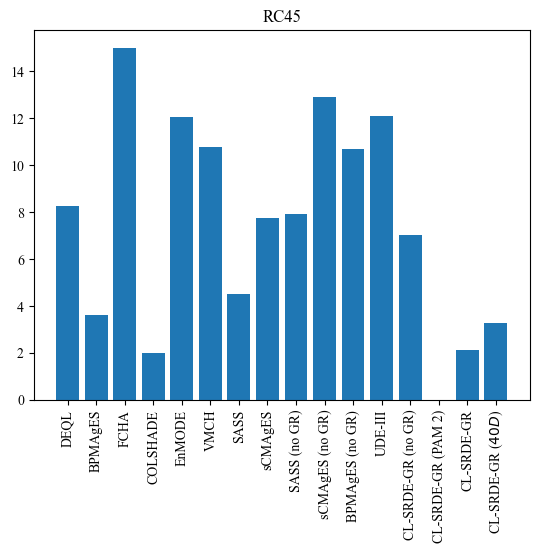

DEQL	0.1239425	0.0
BPMAgES	0.03218372	0.0
FCHA	0.5	0.360022
COLSHADE	0.024814014	0.0
EnMODE	0.078262815	0.0
VMCH	0.12009817	0.0
SASS	0.052336325	0.0
sCMAgES	0.04332289140505164	0.0
SASS (no GR)	0.06211354942584289	0.0
sCMAgES (no GR)	0.10910194	0.0
BPMAgES (no GR)	0.061319663249330615	0.0
UDE-III	0.07802130728308666	0.0
CL-SRDE-GR (no GR)	0.04019801830112091	0.0
CL-SRDE-GR (PAM 2)	0.058193894460574644	0.0
CL-SRDE-GR	0.05453128719535599	0.0
CL-SRDE-GR ($40D$)	0.0531369889781634	0.0


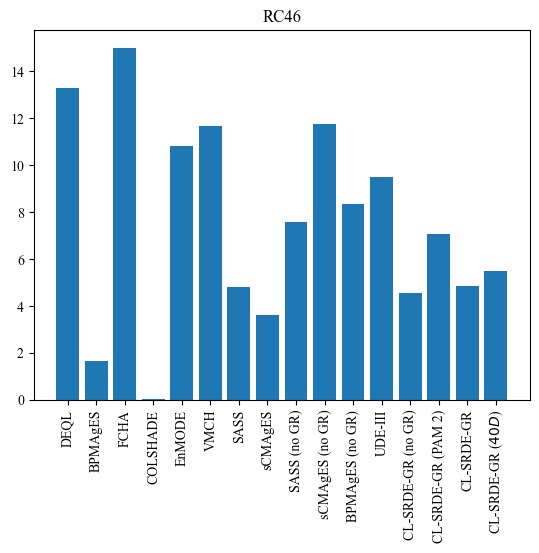

DEQL	0.04664491	0.0
BPMAgES	0.02658586	0.0
FCHA	0.3333333	0.08001793
COLSHADE	0.018931908	0.0
EnMODE	0.10358043	0.0062536897
VMCH	0.092367775	0.0
SASS	0.036669759	0.0
sCMAgES	0.0328894499786529	0.0
SASS (no GR)	0.038236655149060064	0.0
sCMAgES (no GR)	0.092132702	0.0
BPMAgES (no GR)	0.07975539715421887	0.0
UDE-III	0.09094797352474701	0.0
CL-SRDE-GR (no GR)	0.03556312854814319	0.0
CL-SRDE-GR (PAM 2)	0.021357731234132638	0.0
CL-SRDE-GR	0.027207280830542652	0.0
CL-SRDE-GR ($40D$)	0.033449703017605824	0.0


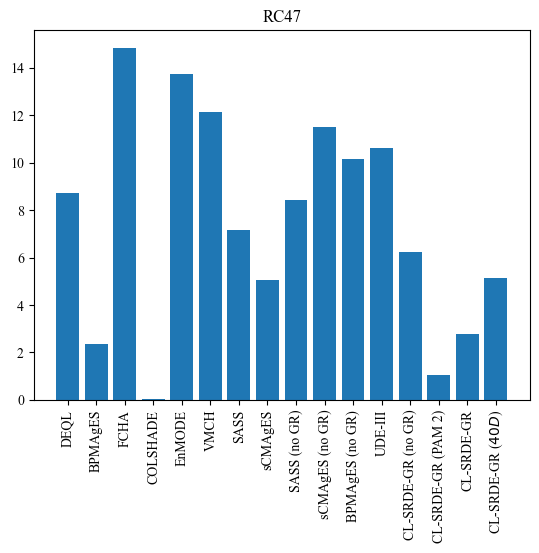

DEQL	0.5721069	0.0
BPMAgES	0.04430111	0.0
FCHA	0.2714182	11.54244
COLSHADE	0.021056664	0.0
EnMODE	0.078169752	0.0
VMCH	0.61567262	0.0
SASS	0.050804223	0.0
sCMAgES	0.05566218011115257	0.0
SASS (no GR)	0.14645939449271925	0.0
sCMAgES (no GR)	0.31327373	0.0
BPMAgES (no GR)	0.523358778455192	0.0
UDE-III	0.22992953996438958	0.0
CL-SRDE-GR (no GR)	0.05282506029528768	0.0
CL-SRDE-GR (PAM 2)	0.0386053030267943	0.0
CL-SRDE-GR	0.038046741993267526	0.0
CL-SRDE-GR ($40D$)	0.04372513433323729	0.0


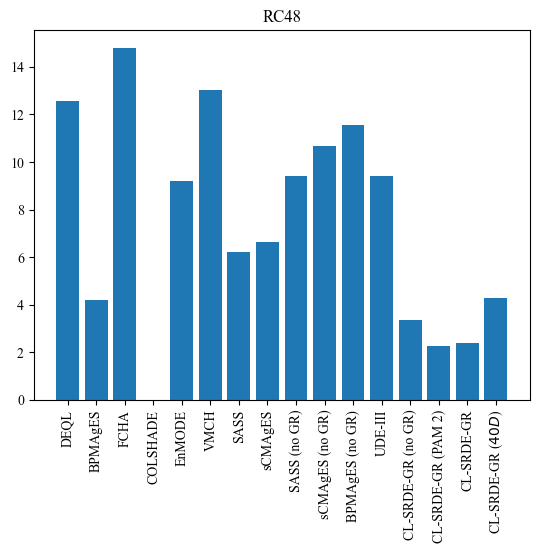

DEQL	0.05895162	0.0
BPMAgES	0.02825408	0.0
FCHA	0.2226018	31.24311
COLSHADE	0.032377703	0.0
EnMODE	0.074788246	0.0
VMCH	0.24109245	0.0
SASS	0.035315411	0.0
sCMAgES	0.17154967901573873	0.0
SASS (no GR)	0.08227695362583994	0.0
sCMAgES (no GR)	0.24333964	0.0
BPMAgES (no GR)	0.08662074289691518	0.0
UDE-III	0.07701351076872553	0.0
CL-SRDE-GR (no GR)	0.024212319425137508	0.0
CL-SRDE-GR (PAM 2)	0.021348804470647	0.0
CL-SRDE-GR	0.01943563236357853	0.0
CL-SRDE-GR ($40D$)	0.023771436361538695	0.0


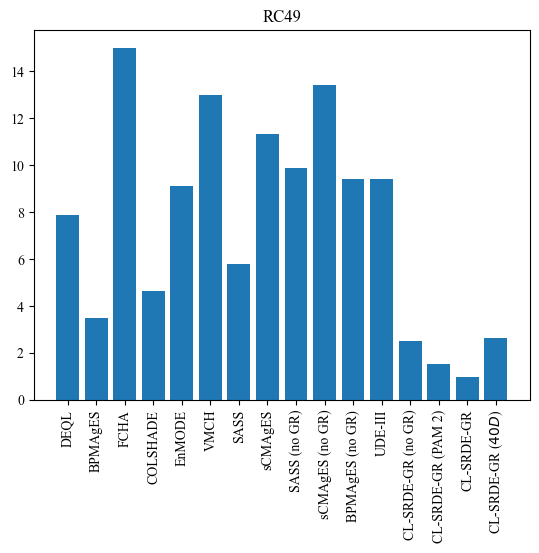

DEQL	0.2865583	0.4694206
BPMAgES	0.0164909	0.0
FCHA	0.4261135	46.92421
COLSHADE	0.039493753	0.0
EnMODE	0.40244882	0.016022503
VMCH	0.31392782	0.0088046594
SASS	0.019581397	0.0
sCMAgES	0.08350058923162741	5.891100242696108e-16
SASS (no GR)	0.18008492105335852	1.2623786234348803e-15
sCMAgES (no GR)	0.36047561	0.0074022619
BPMAgES (no GR)	0.2364670016065916	0.010042479986530036
UDE-III	0.32830613140323905	0.19267904991196957
CL-SRDE-GR (no GR)	0.015666071196109514	0.0
CL-SRDE-GR (PAM 2)	0.015052887686683529	0.0
CL-SRDE-GR	0.015298552273673416	0.0
CL-SRDE-GR ($40D$)	0.01667958724928429	0.0


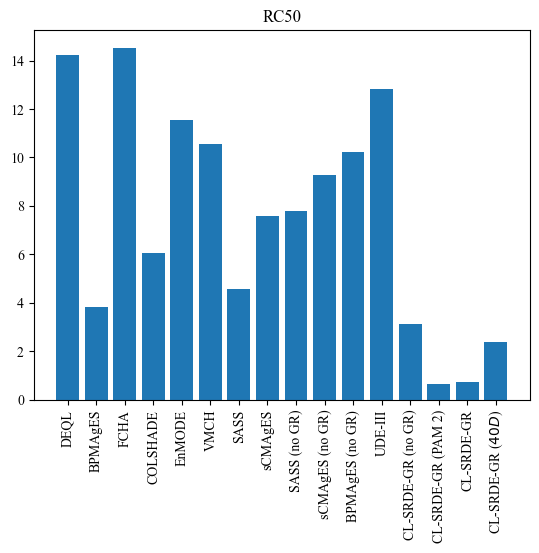

DEQL	4550.732	5.59e-05
BPMAgES	4405.20469074	0.00328515
FCHA	4208.526	0.1113818
COLSHADE	4550.914	2.8224638e-06
EnMODE	4499.1793	0.00051285741
VMCH	4560.096	6.052512e-05
SASS	4550.9309	2.8276565e-06
sCMAgES	4551.0573952627965	3.7439551964321695e-06
SASS (no GR)	4550.859327765134	3.761448769575478e-06
sCMAgES (no GR)	4521.4132	0.00078112438
BPMAgES (no GR)	4299.834991485581	0.003682249061626006
UDE-III	4551.204977496627	5.0844589125034756e-05
CL-SRDE-GR (no GR)	4550.897950334249	4.233696428579403e-05
CL-SRDE-GR (PAM 2)	4551.303612467073	4.616921379430039e-05
CL-SRDE-GR	4551.023442128096	4.2336964967804036e-05
CL-SRDE-GR ($40D$)	4550.0308817038185	0.00022459127587166894


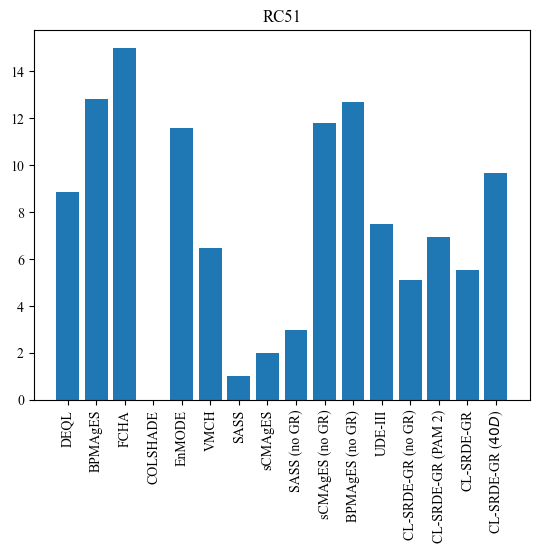

DEQL	3784.63	0.0
BPMAgES	3998.71623718	0.0
FCHA	3881.078	0.01901919
COLSHADE	3370.1332	0.0
EnMODE	3496.8151	0.0
VMCH	4528.0986	0.0
SASS	4128.5398	0.0
sCMAgES	3619.7819233743107	0.0
SASS (no GR)	4933.610335624457	0.0
sCMAgES (no GR)	4230.7262	0.0
BPMAgES (no GR)	3789.831257691425	0.0
UDE-III	3349.3606376279545	0.0
CL-SRDE-GR (no GR)	3348.982164459202	0.0
CL-SRDE-GR (PAM 2)	3371.413256987196	0.0
CL-SRDE-GR	3348.9821492822557	0.0
CL-SRDE-GR ($40D$)	3357.5129260945055	0.0


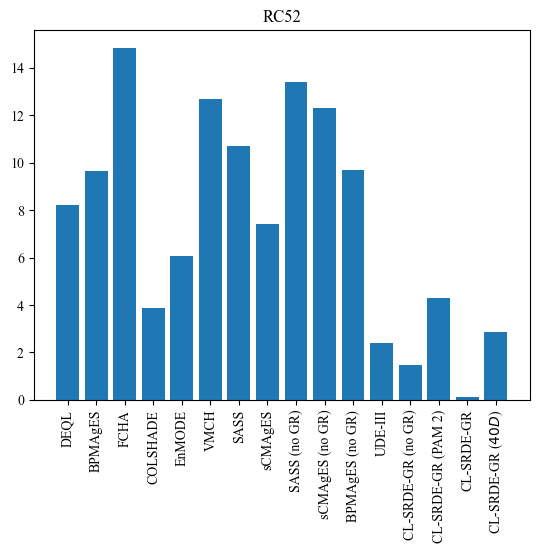

DEQL	5050.047	0.0
BPMAgES	5862.24681922	0.00060624
FCHA	5164.88	0.123214
COLSHADE	5093.8367	0.0
EnMODE	4472.7887	0.0034895834
VMCH	5508.0763	0.0
SASS	5293.5925	0.0
sCMAgES	5470.010635194507	0.0
SASS (no GR)	5532.740177773935	0.0
sCMAgES (no GR)	5594.4645	0.00096017025
BPMAgES (no GR)	5101.431084813909	0.0005219050839352703
UDE-III	5041.936361821404	0.0
CL-SRDE-GR (no GR)	4997.927348996495	0.0
CL-SRDE-GR (PAM 2)	5017.589985654085	0.0
CL-SRDE-GR	4997.686663949516	0.0
CL-SRDE-GR ($40D$)	5030.486914500715	0.0


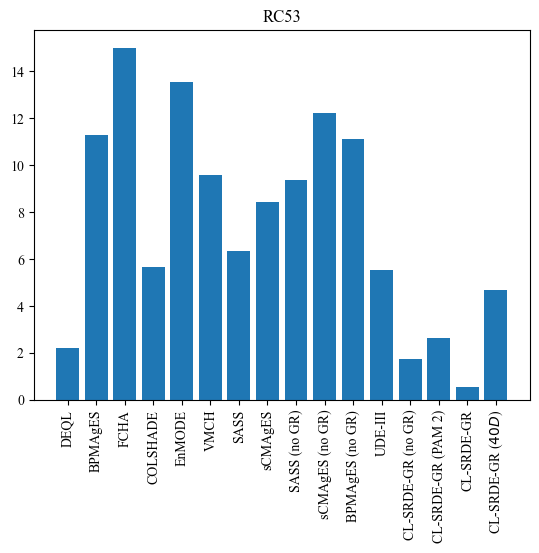

DEQL	4240.544	0.0
BPMAgES	4077.78744158	0.00285823
FCHA	4316.389	0.2577754
COLSHADE	4245.0499	0.0
EnMODE	3338.3778	0.0014052563
VMCH	4253.9173	0.0
SASS	4240.5758	0.0
sCMAgES	4275.8771765514075	0.0
SASS (no GR)	4240.763808967837	0.0
sCMAgES (no GR)	4168.7837	0.00036178505
BPMAgES (no GR)	4225.830145889867	0.003228791905761397
UDE-III	4240.612943097883	0.0
CL-SRDE-GR (no GR)	4240.895950202404	0.0
CL-SRDE-GR (PAM 2)	4240.543994825348	0.0
CL-SRDE-GR	4240.768743112334	0.0
CL-SRDE-GR ($40D$)	4245.678614763821	0.0


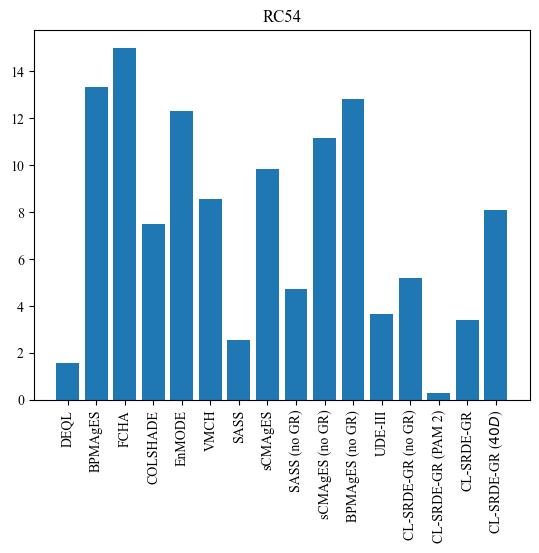

DEQL	2027.907	0.05965665
BPMAgES	7172.96180169	0.00407264
FCHA	7044.425	0.07394048
COLSHADE	6714.5247	0.0
EnMODE	1989.9067	0.0094081412
VMCH	6370.0606	0.0029351767
SASS	6699.5275	0.0
sCMAgES	6727.128910797816	0.0
SASS (no GR)	6732.473229879119	0.0
sCMAgES (no GR)	1718.8063	0.01669935
BPMAgES (no GR)	6451.684695860814	0.002983728234470209
UDE-III	2287.0950959793186	0.05139313924073575
CL-SRDE-GR (no GR)	5825.302228547601	0.0
CL-SRDE-GR (PAM 2)	2299.4640259917023	0.0
CL-SRDE-GR	4084.1530568719695	0.0
CL-SRDE-GR ($40D$)	6136.134240512	0.0


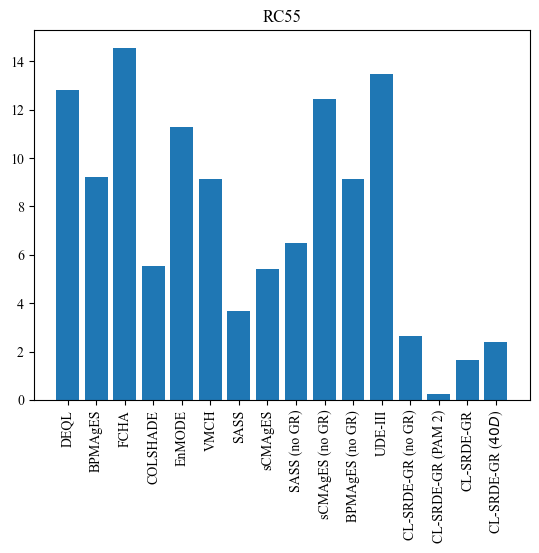

DEQL	11414.64	0.05185439
BPMAgES	20039.81714411	0.00796372
FCHA	11767.37	0.5180004
COLSHADE	14759.4	7.0710818333e-05
EnMODE	8951.9695	0.017032492
VMCH	14503.726	0.0087826184
SASS	14750.698	0.0
sCMAgES	14766.091758881397	0.0
SASS (no GR)	14766.571525010651	0.0
sCMAgES (no GR)	14364.259	0.027710332
BPMAgES (no GR)	17629.825089324626	0.008244659684986859
UDE-III	10751.254361122936	0.05241529135658422
CL-SRDE-GR (no GR)	12440.058356824054	0.0
CL-SRDE-GR (PAM 2)	11664.344947833197	0.0
CL-SRDE-GR	11743.772565938898	0.0
CL-SRDE-GR ($40D$)	13374.009229057636	0.0


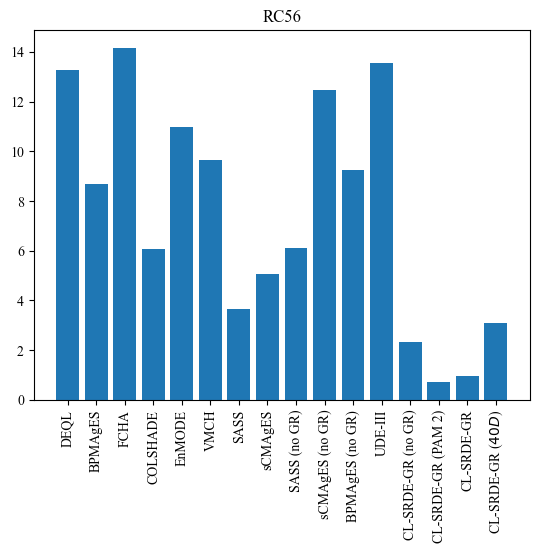

DEQL	2795.065	0.01815883
BPMAgES	11985.2513912	0.0
FCHA	1628.833	0.05519777
COLSHADE	3508.529	0.0
EnMODE	4754.554	0.0021611008
VMCH	2846.0565	0.0022382623
SASS	3213.2932	0.0
sCMAgES	3332.2268155780116	0.0
SASS (no GR)	6790.117332565559	0.0
sCMAgES (no GR)	1740.6232	0.0098572596
BPMAgES (no GR)	6902.045621299658	0.00030850070531177287
UDE-III	2657.504604021923	0.009572293788804184
CL-SRDE-GR (no GR)	3092.626341699944	0.0
CL-SRDE-GR (PAM 2)	2708.2697170983415	0.0
CL-SRDE-GR	2970.0302842610363	0.0
CL-SRDE-GR ($40D$)	2909.6261563779635	0.0


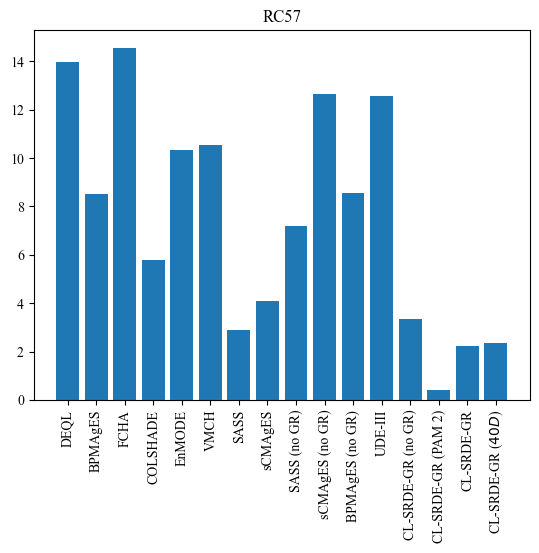

In [31]:
numbers = np.arange(0,NAlg,1)
for prob in range(NProblems):
    for alg in range(NAlg):
        res_s = AllResCEC20[alg,2,:,prob]        
        med = np.median(res_s)
        med_pos = np.argmax(AllResCEC20[alg,2,:,prob] == med)        
        #print(med,med_pos)
        print(f'{AlgNames4_alt1[alg]}\t{AllResCEC20[alg,0,med_pos,prob]}\t{AllResCEC20[alg,1,med_pos,prob]}')
    plt.bar(numbers,RankingProblem[:,prob])
    plt.xticks(numbers,AlgNames4_alt1,rotation ='vertical')
    plt.title(f'RC{prob+1}')
    plt.show()